# Final Project - Forecasting mutual funds yield in Israel

Group number: 48

Aviv Yefet 208495267

Chanan Jacobs 316090877

Odeya Rachamim 

### import 

In [1]:

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from datetime import datetime 
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from pandas import Series,DataFrame

%matplotlib inline
sns.set_style('whitegrid')

from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

### Load datasets

"K209" files of mutual fund in 2019

In [2]:
# "K209" files containing the monthly reports of mutual funds in 2019

Data1 = pd.read_csv('hodshi_012019.csv',encoding='UTF-8')
Data2 = pd.read_csv('hodshi_022019.csv',encoding='UTF-8')
Data3 = pd.read_csv('hodshi_032019.csv',encoding='UTF-8')
Data4 = pd.read_csv('hodshi_042019.csv',encoding='UTF-8')
Data5 = pd.read_csv('hodshi_052019.csv',encoding='UTF-8')
Data6 = pd.read_csv('hodshi_062019.csv',encoding='UTF-8')
Data7 = pd.read_csv('hodshi_072019.csv',encoding='UTF-8')
Data8 = pd.read_csv('hodshi_082019.csv',encoding='UTF-8')
Data9 = pd.read_csv('hodshi_092019.csv',encoding='UTF-8')
Data10 = pd.read_csv('hodshi_102019.csv',encoding='UTF-8')
Data11 = pd.read_csv('hodshi_112019.csv',encoding='UTF-8')
Data12 = pd.read_csv('hodshi_122019.csv',encoding='UTF-8')

print(Data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265756 entries, 0 to 265755
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   MISPAR MENAHE           265756 non-null  int64  
 1   MISPAR KEREN            265756 non-null  int64  
 2   SHEM KEREN              265756 non-null  object 
 3   PTUCHA/SGURA            261278 non-null  object 
 4   SHEM NECHES             265756 non-null  object 
 5   MISPAR NIYAR            265756 non-null  object 
 6   MISPAR MEZAHE           265756 non-null  int64  
 7   SUG MISPAR MEZAHE       265756 non-null  int64  
 8   TEUR SUG MISPAR MEZAHE  265756 non-null  object 
 9   KAMUT                   265756 non-null  float64
 10  SHOVI                   265756 non-null  int64  
 11  MECHIR                  265756 non-null  float64
 12  SHOVI MATBEA            265756 non-null  float64
 13  ACHUZ MIKEREN           265756 non-null  float64
 14  KAMUT HASHALA       

In [3]:
# merge files into a single file
Data = pd.concat([Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12], axis=0)
dict = {'MISPAR MENAHE':'Mannager_Number',
        'MISPAR KEREN':'Fund_Number',
        'SHEM KEREN':'Fund_Name',
        'PTUCHA/SGURA':'Fund_Type',
        'SHEM NECHES':'Asset_name',
        'MISPAR NIYAR':'Security_Num',
        'MISPAR MEZAHE':'Identity_Num',
        'SUG MISPAR MEZAHE':'Identity_Num_Type',
        'TEUR SUG MISPAR MEZAHE':'Identity_Num_Type_Describe',    
        'KAMUT':'Amount',
        'SHOVI':'Value',
        'MECHIR':'Price',
        'SHOVI MATBEA':'Currency_Value',
        'ACHUZ MIKEREN':'Precent_From_Fund',
        'KAMUT HASHALA':'lending_Ammount',
        'SUG MECHIR':'Price_Type',
        'MAKOM MISCHAR':'Country_of_trade',
        'SHUK MISCHAR':'Trading_Market', 
        'MATBEA':'Currency',
        'SHAAR MATBEA':'Currency_Rate',
        'KAMUT LEPIDION':'Redemption_Amount',
        'RIBIT ZVURA':'Accumalted_Intrest',
        'TICKER':'TICKER',
        'HITCHAYVUT':'Commitment',
        'DARGAT AGACH':'Degree_of_Bond',
        'KOD CHEVRA MEDAREGET':'Tiering_company_code',
        'KOD BANK':'Bank_code',
        'TAARICH DIVUCAH':'Report_Date',
        'MISPAR RESHUMA BATOFES':'Num_of_record_in_form',
        'MISPAR RESHUMUT':'Num_of_records',
        'MISPAR ASMACHTA':'Num_of_reference'}
Data.rename(columns=dict,inplace=True)

Data["Report_Date"] = pd.to_datetime(Data["Report_Date"])

list_data=[Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12]
for curr_data in list_data:
    curr_data.rename(columns=dict,inplace=True)  
    curr_data["Report_Date"] = pd.to_datetime(curr_data["Report_Date"])

In [4]:
Data.head()

,Mannager_Number,Fund_Number,Fund_Name,Fund_Type,Asset_name,Security_Num,Identity_Num,Identity_Num_Type,Identity_Num_Type_Describe,Amount,...,Accumalted_Intrest,TICKER,Commitment,Degree_of_Bond,Tiering_company_code,Bank_code,Report_Date,Num_of_record_in_form,Num_of_records,Num_of_reference
0,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,טיב טעם הולדינגס 0.25שח ...,103010,1,1,"מס' בורסה ת""א",32945.0,...,0.0,TTAM,1,,0,31,2019-01-31,1,4717,2019-03-014685
1,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,ביטפארמס טכנו מר 0.01שח ...,1080241,1,1,"מס' בורסה ת""א",3243.0,...,0.0,BLLCF,1,,0,31,2019-01-31,2,4717,2019-03-014685
2,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,המלט 1 ...,1080324,1,1,"מס' בורסה ת""א",427.0,...,0.0,HAML,1,,0,31,2019-01-31,3,4717,2019-03-014685
3,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,רימוני מר 1 ...,1080456,1,1,"מס' בורסה ת""א",1059.0,...,0.0,RIMO,1,,0,31,2019-01-31,4,4717,2019-03-014685
4,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,אנליסט מ''ר 1 ...,1080613,1,1,"מס' בורסה ת""א",637.0,...,0.0,ANLT,1,,0,31,2019-01-31,5,4717,2019-03-014685


In [5]:
# Dataset columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3311487 entries, 0 to 291336
Data columns (total 31 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Mannager_Number             int64         
 1   Fund_Number                 int64         
 2   Fund_Name                   object        
 3   Fund_Type                   object        
 4   Asset_name                  object        
 5   Security_Num                object        
 6   Identity_Num                int64         
 7   Identity_Num_Type           int64         
 8   Identity_Num_Type_Describe  object        
 9   Amount                      float64       
 10  Value                       int64         
 11  Price                       float64       
 12  Currency_Value              float64       
 13  Precent_From_Fund           float64       
 14  lending_Ammount             object        
 15  Price_Type                  int64         
 16  Country_of_trade   

#####  

Yearly yield 2019 file

In [6]:
#loading yearly yield file
Raw_year_Yield_data = pd.read_csv('year_yield.csv',encoding='UTF-8')

#clean data:
Raw_year_Yield_data = Raw_year_Yield_data[8:]
Raw_year_Yield_data.columns = Raw_year_Yield_data.iloc[0]
Raw_year_Yield_data = Raw_year_Yield_data[1:]
year_yield = Raw_year_Yield_data[["מס' קרן בבורסה", 'תשואה שקלית של הקרן']]
year_yield = year_yield.reset_index(drop = True)    
year_yield = year_yield[:2127]
dict = {"מס' קרן בבורסה":'Fund_Number','תשואה שקלית של הקרן':'Yearly_yield'}
year_yield.rename(columns=dict,inplace=True)
year_yield['Yearly_yield']=year_yield['Yearly_yield'].astype(float)
year_yield['Fund_Number']=year_yield['Fund_Number'].astype(int)
year_yield

8,Fund_Number,Yearly_yield
0,5119904,8.46
1,5125232,12.28
2,5125224,41.07
3,5125240,30.98
4,5112628,21.19
...,...,...
2122,5128814,-0.08
2123,5128426,21.14
2124,5130034,-0.75
2125,5123393,9.63


### Defining functions 

In [7]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

### 

# 1. משתנה שינוי חודשי בנכסי הקרן 

### Creating MCFA - Monthly change in fund assets variable

In [8]:
# first we will filter only assets from each month:
# Identity_Num column describes the asset ID. The column contains values from 1 to 99 that describe the assets type(stock, ETF, bond...)
# and values from 100 to 304 that describe the fund's commitment(deposits, liabilities..)

Month1_assets = Data1.loc[(Data1['Identity_Num']<100)]
Month2_assets = Data2.loc[(Data2['Identity_Num']<100)]
Month3_assets = Data3.loc[(Data3['Identity_Num']<100)]
Month4_assets = Data4.loc[(Data4['Identity_Num']<100)]
Month5_assets = Data5.loc[(Data5['Identity_Num']<100)]
Month6_assets = Data6.loc[(Data6['Identity_Num']<100)]
Month7_assets = Data7.loc[(Data7['Identity_Num']<100)]
Month8_assets = Data8.loc[(Data8['Identity_Num']<100)]
Month9_assets = Data9.loc[(Data9['Identity_Num']<100)]
Month10_assets = Data10.loc[(Data10['Identity_Num']<100)]
Month11_assets = Data11.loc[(Data11['Identity_Num']<100)]
Month12_assets = Data12.loc[(Data12['Identity_Num']<100)]



Creation of a "Assets_unique" table containing for each fund and each asset the number of assets units throughout 2019

In [9]:

Assets_unique = pd.DataFrame(Data[['Fund_Number','Fund_Name','Identity_Num','Security_Num', 'Asset_name']])
Assets_unique = Assets_unique.loc[(Assets_unique['Identity_Num']<100)] # filter only assetן
Assets_unique = (Assets_unique[['Fund_Number','Security_Num']].drop_duplicates()) # finding the unique assets for each fund throughout 2019


list_months = [Month1_assets,Month2_assets,Month3_assets,Month4_assets,Month5_assets,Month6_assets,Month7_assets,Month8_assets,Month9_assets,Month10_assets,Month11_assets,Month12_assets]

# for each fund and asset that existed throughout 2019, we will present the number of units each fund had throughout 2019
for i in range(len(list_months)):
    curr_month = list_months[i]
    curr_month = pd.DataFrame(curr_month[['Fund_Number','Security_Num','Amount']])
    curr_month['Amount'] = curr_month['Amount'].abs()
    curr_month = curr_month.drop_duplicates(subset = ['Fund_Number', 'Security_Num'],keep = 'last').reset_index(drop = True)
    Assets_unique = pd.merge(Assets_unique,curr_month,on = ['Fund_Number','Security_Num'],how ="left")
    curr_amount = ('Amount_month'+str(i+1))
    Assets_unique.rename(columns ={'Amount':curr_amount}, inplace=True)
    
Assets_unique = Assets_unique.fillna(0)

data_parameter2 = Assets_unique.copy()

Assets_unique

,Fund_Number,Security_Num,Amount_month1,Amount_month2,Amount_month3,Amount_month4,Amount_month5,Amount_month6,Amount_month7,Amount_month8,Amount_month9,Amount_month10,Amount_month11,Amount_month12
0,5100946,103010,32945.0,28300.0,4798.0,4798.0,4798.0,4798.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5100946,1080241,3243.0,3243.0,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5100946,1080324,427.0,339.0,591.0,497.0,361.0,361.0,361.0,361.0,361.0,469.0,390.0,390.0
3,5100946,1080456,1059.0,678.0,794.0,794.0,764.0,764.0,651.0,399.0,399.0,239.0,239.0,239.0
4,5100946,1080613,637.0,637.0,452.0,452.0,452.0,452.0,26.0,26.0,26.0,26.0,26.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266669,5130380,6040323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2164818.0
266670,5130380,6040422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2829509.0
266671,5130380,6910137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,459434.0
266672,5130380,7480155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2603231.0


In [10]:
# Sampling a line and comparing it to the Excel file to check that there is no error
Assets_unique.sample()

,Fund_Number,Security_Num,Amount_month1,Amount_month2,Amount_month3,Amount_month4,Amount_month5,Amount_month6,Amount_month7,Amount_month8,Amount_month9,Amount_month10,Amount_month11,Amount_month12
92253,5113097,1940444,4681322.0,4681322.0,4681322.0,4681322.0,4681322.0,4681322.0,4681322.0,4681322.0,4681322.0,4681322.0,4681322.0,0.0


MCFA variable calculation :
1. Calculation of the number of monthly change units for each fund
2. Calculation of the monthly amount of assets for each fund
3. Calculation of normalized MCFA variable

1. Calculation of the number of monthly change units for each fund

In [11]:
# Calculation of the number of change units for each asset

Test1 = pd.DataFrame(Assets_unique[['Fund_Number','Security_Num']])

Test1['Diff_month1_2'] = Assets_unique['Amount_month2']-Assets_unique['Amount_month1']
Test1['Diff_month2_3'] = Assets_unique['Amount_month3']-Assets_unique['Amount_month2']
Test1['Diff_month3_4'] = Assets_unique['Amount_month4']-Assets_unique['Amount_month3']
Test1['Diff_month4_5'] = Assets_unique['Amount_month5']-Assets_unique['Amount_month4']
Test1['Diff_month5_6'] = Assets_unique['Amount_month6']-Assets_unique['Amount_month5']
Test1['Diff_month6_7'] = Assets_unique['Amount_month7']-Assets_unique['Amount_month6']
Test1['Diff_month7_8'] = Assets_unique['Amount_month8']-Assets_unique['Amount_month7']
Test1['Diff_month8_9'] = Assets_unique['Amount_month9']-Assets_unique['Amount_month8']
Test1['Diff_month9_10'] = Assets_unique['Amount_month10']-Assets_unique['Amount_month9']
Test1['Diff_month10_11'] = Assets_unique['Amount_month11']-Assets_unique['Amount_month10']
Test1['Diff_month11_12'] = Assets_unique['Amount_month12']-Assets_unique['Amount_month11']

# if there is a change in the amount of assets from one month to the previous month, we will set a change unit of 1,
# if there is no change in the amount of assets, we will set the unit of change as 0

Test1.loc[Test1['Diff_month1_2'] != 0, 'Diff_month1_2'] = 1
Test1.loc[Test1['Diff_month2_3'] != 0, 'Diff_month2_3'] = 1
Test1.loc[Test1['Diff_month3_4'] != 0, 'Diff_month3_4'] = 1
Test1.loc[Test1['Diff_month4_5'] != 0, 'Diff_month4_5'] = 1
Test1.loc[Test1['Diff_month5_6'] != 0, 'Diff_month5_6'] = 1
Test1.loc[Test1['Diff_month6_7'] != 0, 'Diff_month6_7'] = 1
Test1.loc[Test1['Diff_month7_8'] != 0, 'Diff_month7_8'] = 1
Test1.loc[Test1['Diff_month8_9'] != 0, 'Diff_month8_9'] = 1
Test1.loc[Test1['Diff_month9_10'] != 0, 'Diff_month9_10'] = 1
Test1.loc[Test1['Diff_month10_11'] != 0, 'Diff_month10_11'] = 1
Test1.loc[Test1['Diff_month11_12'] != 0, 'Diff_month11_12'] = 1


In [12]:
Test1

,Fund_Number,Security_Num,Diff_month1_2,Diff_month2_3,Diff_month3_4,Diff_month4_5,Diff_month5_6,Diff_month6_7,Diff_month7_8,Diff_month8_9,Diff_month9_10,Diff_month10_11,Diff_month11_12
0,5100946,103010,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5100946,1080241,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5100946,1080324,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,5100946,1080456,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,5100946,1080613,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266669,5130380,6040323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
266670,5130380,6040422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
266671,5130380,6910137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
266672,5130380,7480155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
# For each fund the number of monthly change units is calculated

df_monthly_rate = Test1.groupby(['Fund_Number'])['Diff_month1_2'].sum().reset_index(name='sum_1_2')
df_monthly_rate['sum_2_3'] = Test1.groupby(['Fund_Number'])['Diff_month2_3'].sum().reset_index(name='sum_2_3').drop('Fund_Number',axis=1)
df_monthly_rate['sum_3_4'] = Test1.groupby(['Fund_Number'])['Diff_month3_4'].sum().reset_index(name='sum_3_4').drop('Fund_Number',axis=1)
df_monthly_rate['sum_4_5'] = Test1.groupby(['Fund_Number'])['Diff_month4_5'].sum().reset_index(name='sum_4_5').drop('Fund_Number',axis=1)
df_monthly_rate['sum_5_6'] = Test1.groupby(['Fund_Number'])['Diff_month5_6'].sum().reset_index(name='sum_5_6').drop('Fund_Number',axis=1)
df_monthly_rate['sum_6_7'] = Test1.groupby(['Fund_Number'])['Diff_month6_7'].sum().reset_index(name='sum_6_7').drop('Fund_Number',axis=1)
df_monthly_rate['sum_7_8'] = Test1.groupby(['Fund_Number'])['Diff_month7_8'].sum().reset_index(name='sum_7_8').drop('Fund_Number',axis=1)
df_monthly_rate['sum_8_9'] = Test1.groupby(['Fund_Number'])['Diff_month8_9'].sum().reset_index(name='sum_8_9').drop('Fund_Number',axis=1)
df_monthly_rate['sum_9_10'] = Test1.groupby(['Fund_Number'])['Diff_month9_10'].sum().reset_index(name='sum_9_10').drop('Fund_Number',axis=1)
df_monthly_rate['sum_10_11'] = Test1.groupby(['Fund_Number'])['Diff_month10_11'].sum().reset_index(name='sum_10_11').drop('Fund_Number',axis=1)
df_monthly_rate['sum_11_12'] = Test1.groupby(['Fund_Number'])['Diff_month11_12'].sum().reset_index(name='sum_11_12').drop('Fund_Number',axis=1)

df_monthly_rate = df_monthly_rate.set_index('Fund_Number')
df_monthly_rate

,sum_1_2,sum_2_3,sum_3_4,sum_4_5,sum_5_6,sum_6_7,sum_7_8,sum_8_9,sum_9_10,sum_10_11,sum_11_12
Fund_Number,,,,,,,,,,,
1142538,7.0,19.0,19.0,18.0,10.0,5.0,3.0,4.0,6.0,2.0,5.0
1143700,61.0,58.0,60.0,53.0,56.0,65.0,69.0,61.0,59.0,64.0,60.0
1143718,163.0,161.0,161.0,154.0,157.0,165.0,173.0,162.0,157.0,159.0,166.0
1143726,5.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,5.0,5.0,5.0
1143734,15.0,16.0,17.0,14.0,14.0,16.0,13.0,16.0,16.0,15.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
5231030,23.0,28.0,23.0,18.0,37.0,54.0,31.0,40.0,25.0,35.0,47.0
5231055,15.0,14.0,12.0,7.0,25.0,18.0,5.0,22.0,7.0,21.0,31.0
5231097,7.0,5.0,4.0,5.0,2.0,1.0,5.0,9.0,10.0,9.0,4.0


2. Calculation of the monthly amount of assets for each fund

In [14]:
Assets_unique.loc[Assets_unique['Amount_month1'] != 0, 'Amount_month1'] = 1
Assets_unique.loc[Assets_unique['Amount_month2'] != 0, 'Amount_month2'] = 1
Assets_unique.loc[Assets_unique['Amount_month3'] != 0, 'Amount_month3'] = 1
Assets_unique.loc[Assets_unique['Amount_month4'] != 0, 'Amount_month4'] = 1
Assets_unique.loc[Assets_unique['Amount_month5'] != 0, 'Amount_month5'] = 1
Assets_unique.loc[Assets_unique['Amount_month6'] != 0, 'Amount_month6'] = 1
Assets_unique.loc[Assets_unique['Amount_month7'] != 0, 'Amount_month7'] = 1
Assets_unique.loc[Assets_unique['Amount_month8'] != 0, 'Amount_month8'] = 1
Assets_unique.loc[Assets_unique['Amount_month9'] != 0, 'Amount_month9'] = 1
Assets_unique.loc[Assets_unique['Amount_month10'] != 0, 'Amount_month10'] = 1
Assets_unique.loc[Assets_unique['Amount_month11'] != 0, 'Amount_month11'] = 1
Assets_unique.loc[Assets_unique['Amount_month12'] != 0, 'Amount_month12'] = 1

Assets_unique['sum'] = (Assets_unique['Amount_month1']+Assets_unique['Amount_month2']+Assets_unique['Amount_month3']+Assets_unique['Amount_month4']+Assets_unique['Amount_month5']+Assets_unique['Amount_month6']+Assets_unique['Amount_month7']+Assets_unique['Amount_month8']+Assets_unique['Amount_month9']+Assets_unique['Amount_month10']+Assets_unique['Amount_month11']+Assets_unique['Amount_month12'])
Assets_unique

,Fund_Number,Security_Num,Amount_month1,Amount_month2,Amount_month3,Amount_month4,Amount_month5,Amount_month6,Amount_month7,Amount_month8,Amount_month9,Amount_month10,Amount_month11,Amount_month12,sum
0,5100946,103010,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,5100946,1080241,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,5100946,1080324,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0
3,5100946,1080456,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0
4,5100946,1080613,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266669,5130380,6040323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
266670,5130380,6040422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
266671,5130380,6910137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
266672,5130380,7480155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [15]:
# Calculation of the amount of assets for each fund for each month
df_monthly_assets = Assets_unique.groupby(['Fund_Number'])['Amount_month2'].sum().reset_index(name='sum_1_2')
df_monthly_assets['sum_2_3'] = Assets_unique.groupby(['Fund_Number'])['Amount_month3'].sum().reset_index(name='amount4').drop('Fund_Number',axis=1)
df_monthly_assets['sum_3_4'] = Assets_unique.groupby(['Fund_Number'])['Amount_month4'].sum().reset_index(name='amount5').drop('Fund_Number',axis=1)
df_monthly_assets['sum_4_5'] = Assets_unique.groupby(['Fund_Number'])['Amount_month5'].sum().reset_index(name='amount6').drop('Fund_Number',axis=1)
df_monthly_assets['sum_5_6'] = Assets_unique.groupby(['Fund_Number'])['Amount_month6'].sum().reset_index(name='amount7').drop('Fund_Number',axis=1)
df_monthly_assets['sum_6_7'] = Assets_unique.groupby(['Fund_Number'])['Amount_month7'].sum().reset_index(name='amount8').drop('Fund_Number',axis=1)
df_monthly_assets['sum_7_8'] = Assets_unique.groupby(['Fund_Number'])['Amount_month8'].sum().reset_index(name='amount9').drop('Fund_Number',axis=1)
df_monthly_assets['sum_8_9'] = Assets_unique.groupby(['Fund_Number'])['Amount_month9'].sum().reset_index(name='amount10').drop('Fund_Number',axis=1)
df_monthly_assets['sum_9_10'] = Assets_unique.groupby(['Fund_Number'])['Amount_month10'].sum().reset_index(name='amount11').drop('Fund_Number',axis=1)
df_monthly_assets['sum_10_11'] = Assets_unique.groupby(['Fund_Number'])['Amount_month11'].sum().reset_index(name='amount12').drop('Fund_Number',axis=1)
df_monthly_assets['sum_11_12'] = Assets_unique.groupby(['Fund_Number'])['Amount_month12'].sum().reset_index(name='amount12').drop('Fund_Number',axis=1)

df_monthly_assets = df_monthly_assets.set_index('Fund_Number')
df_monthly_assets

,sum_1_2,sum_2_3,sum_3_4,sum_4_5,sum_5_6,sum_6_7,sum_7_8,sum_8_9,sum_9_10,sum_10_11,sum_11_12
Fund_Number,,,,,,,,,,,
1142538,30.0,31.0,31.0,31.0,31.0,33.0,34.0,35.0,36.0,36.0,37.0
1143700,45.0,48.0,47.0,41.0,50.0,50.0,54.0,42.0,52.0,47.0,48.0
1143718,143.0,144.0,142.0,138.0,144.0,148.0,152.0,136.0,147.0,145.0,149.0
1143726,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
1143734,20.0,20.0,18.0,24.0,23.0,18.0,22.0,25.0,24.0,23.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...
5231030,107.0,105.0,116.0,118.0,125.0,138.0,135.0,134.0,136.0,132.0,141.0
5231055,103.0,105.0,110.0,109.0,110.0,108.0,107.0,104.0,101.0,109.0,115.0
5231097,17.0,16.0,15.0,14.0,13.0,12.0,12.0,9.0,11.0,14.0,14.0


3. Calculation of normalized MCFA variable

In [16]:
# Normalize the variable by dividing the number of units of the monthly change by the monthly amount of assets

MCFA_df = df_monthly_rate.div(df_monthly_assets)
#MCFA_df.to_excel('MCFA.xlsx', index=True)

In [17]:
MCFA_df

,sum_1_2,sum_2_3,sum_3_4,sum_4_5,sum_5_6,sum_6_7,sum_7_8,sum_8_9,sum_9_10,sum_10_11,sum_11_12
Fund_Number,,,,,,,,,,,
1142538,0.233333,0.612903,0.612903,0.580645,0.322581,0.151515,0.088235,0.114286,0.166667,0.055556,0.135135
1143700,1.355556,1.208333,1.276596,1.292683,1.120000,1.300000,1.277778,1.452381,1.134615,1.361702,1.250000
1143718,1.139860,1.118056,1.133803,1.115942,1.090278,1.114865,1.138158,1.191176,1.068027,1.096552,1.114094
1143726,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000,1.000000,1.000000
1143734,0.750000,0.800000,0.944444,0.583333,0.608696,0.888889,0.590909,0.640000,0.666667,0.652174,0.458333
...,...,...,...,...,...,...,...,...,...,...,...
5231030,0.214953,0.266667,0.198276,0.152542,0.296000,0.391304,0.229630,0.298507,0.183824,0.265152,0.333333
5231055,0.145631,0.133333,0.109091,0.064220,0.227273,0.166667,0.046729,0.211538,0.069307,0.192661,0.269565
5231097,0.411765,0.312500,0.266667,0.357143,0.153846,0.083333,0.416667,1.000000,0.909091,0.642857,0.285714


In [ ]:
# Sampling a line and comparing it to the Excel file to check that there is no error
# MCFA_df.sample()
# df_monthly_rate.loc[5116736,]
# df_monthly_assets.loc[5116736,]

### 

### Creating YCFA - Yearly change in fund assets variable

In [18]:
# Scheme of the monthly change units to obtain the number of yearly change units of the fund
df_monthly_rate['sum diff'] = (df_monthly_rate['sum_1_2']+df_monthly_rate['sum_2_3']+df_monthly_rate['sum_3_4']+df_monthly_rate['sum_4_5']+df_monthly_rate['sum_5_6']+df_monthly_rate['sum_6_7']+df_monthly_rate['sum_7_8']+df_monthly_rate['sum_8_9']+df_monthly_rate['sum_9_10']+df_monthly_rate['sum_10_11']+df_monthly_rate['sum_11_12'])

# Calculation of the annual average amount of assets for each fund
df_monthly_rate['average assets'] = (df_monthly_assets['sum_1_2']+df_monthly_assets['sum_2_3']+df_monthly_assets['sum_3_4']+df_monthly_assets['sum_4_5']+df_monthly_assets['sum_5_6']+df_monthly_assets['sum_6_7']+df_monthly_assets['sum_7_8']+df_monthly_assets['sum_8_9']+df_monthly_assets['sum_9_10']+df_monthly_assets['sum_10_11']+df_monthly_assets['sum_11_12'])/12
df_monthly_rate

,sum_1_2,sum_2_3,sum_3_4,sum_4_5,sum_5_6,sum_6_7,sum_7_8,sum_8_9,sum_9_10,sum_10_11,sum_11_12,sum diff,average assets
Fund_Number,,,,,,,,,,,,,
1142538,7.0,19.0,19.0,18.0,10.0,5.0,3.0,4.0,6.0,2.0,5.0,98.0,30.416667
1143700,61.0,58.0,60.0,53.0,56.0,65.0,69.0,61.0,59.0,64.0,60.0,666.0,43.666667
1143718,163.0,161.0,161.0,154.0,157.0,165.0,173.0,162.0,157.0,159.0,166.0,1778.0,132.333333
1143726,5.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,5.0,5.0,5.0,57.0,4.666667
1143734,15.0,16.0,17.0,14.0,14.0,16.0,13.0,16.0,16.0,15.0,11.0,163.0,20.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231030,23.0,28.0,23.0,18.0,37.0,54.0,31.0,40.0,25.0,35.0,47.0,361.0,115.583333
5231055,15.0,14.0,12.0,7.0,25.0,18.0,5.0,22.0,7.0,21.0,31.0,177.0,98.416667
5231097,7.0,5.0,4.0,5.0,2.0,1.0,5.0,9.0,10.0,9.0,4.0,61.0,12.250000


In [19]:
# Normalize the variable by dividing the number of units of the yearly change by the average amount of assets

YCFA_df = df_monthly_rate[['sum diff','average assets']]
YCFA_df ['YCFA'] = YCFA_df['sum diff']/YCFA_df['average assets']


In [20]:
YCFA_df 

,sum diff,average assets,YCFA
Fund_Number,,,
1142538,98.0,30.416667,3.221918
1143700,666.0,43.666667,15.251908
1143718,1778.0,132.333333,13.435768
1143726,57.0,4.666667,12.214286
1143734,163.0,20.083333,8.116183
...,...,...,...
5231030,361.0,115.583333,3.123288
5231055,177.0,98.416667,1.798476
5231097,61.0,12.250000,4.979592


###  

### Creating MVCF - Monthly asset value change variable


1. Calculation of the absolute value of the change in the amount of asset units between one month and the previous month
2. Multiplying the monthly asset change by the asset unit value
3. Calculation of the monthly value change for each fund
4. division of the value of the monthly change in the net value of the fund's assets

1. Calculation of the absolute value of the change in the amount of asset units between one month and the previous month

In [21]:
parameter2 = pd.DataFrame(data_parameter2[['Fund_Number','Security_Num']])

parameter2['Diff_month1_2'] = data_parameter2['Amount_month2']-data_parameter2['Amount_month1']
parameter2['Diff_month2_3'] = data_parameter2['Amount_month3']-data_parameter2['Amount_month2']
parameter2['Diff_month3_4'] = data_parameter2['Amount_month4']-data_parameter2['Amount_month3']
parameter2['Diff_month4_5'] = data_parameter2['Amount_month5']-data_parameter2['Amount_month4']
parameter2['Diff_month5_6'] = data_parameter2['Amount_month6']-data_parameter2['Amount_month5']
parameter2['Diff_month6_7'] = data_parameter2['Amount_month7']-data_parameter2['Amount_month6']
parameter2['Diff_month7_8'] = data_parameter2['Amount_month8']-data_parameter2['Amount_month7']
parameter2['Diff_month8_9'] = data_parameter2['Amount_month9']-data_parameter2['Amount_month8']
parameter2['Diff_month9_10'] = data_parameter2['Amount_month10']-data_parameter2['Amount_month9']
parameter2['Diff_month10_11'] = data_parameter2['Amount_month11']-data_parameter2['Amount_month10']
parameter2['Diff_month11_12'] = data_parameter2['Amount_month12']-data_parameter2['Amount_month11']
parameter2

diff_df = parameter2
columns = diff_df.columns
columns = columns[2:]
diff_df[columns] = diff_df[columns].abs()


In [22]:
diff_df

,Fund_Number,Security_Num,Diff_month1_2,Diff_month2_3,Diff_month3_4,Diff_month4_5,Diff_month5_6,Diff_month6_7,Diff_month7_8,Diff_month8_9,Diff_month9_10,Diff_month10_11,Diff_month11_12
0,5100946,103010,4645.0,23502.0,0.0,0.0,0.0,4798.0,0.0,0.0,0.0,0.0,0.0
1,5100946,1080241,0.0,1725.0,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5100946,1080324,88.0,252.0,94.0,136.0,0.0,0.0,0.0,0.0,108.0,79.0,0.0
3,5100946,1080456,381.0,116.0,0.0,30.0,0.0,113.0,252.0,0.0,160.0,0.0,0.0
4,5100946,1080613,0.0,185.0,0.0,0.0,0.0,426.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266669,5130380,6040323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2164818.0
266670,5130380,6040422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2829509.0
266671,5130380,6910137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,459434.0
266672,5130380,7480155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2603231.0


2. Multiplying the monthly asset change by the asset unit value

In [23]:
Assets_parmater2 = pd.DataFrame(Data[['Fund_Number','Security_Num','Identity_Num']])
Assets_parmater2 = Assets_parmater2.loc[(Assets_parmater2['Identity_Num']<100)]
Assets_parmater2 = (Assets_parmater2[['Fund_Number','Security_Num']].drop_duplicates())


list_months = [Month1_assets,Month2_assets,Month3_assets,Month4_assets,Month5_assets,Month6_assets,Month7_assets,Month8_assets,Month9_assets,Month10_assets,Month11_assets,Month12_assets]
for i in range(len(list_months)):
    curr_month = list_months[i]
    curr_month = pd.DataFrame(curr_month[['Fund_Number','Security_Num','Price']])
    curr_month = curr_month.drop_duplicates(subset = ['Fund_Number', 'Security_Num'],keep = 'last').reset_index(drop = True)
    Assets_parmater2 = pd.merge(Assets_parmater2,curr_month,on =['Fund_Number','Security_Num'],how ="left")
    curr_price = ('Price'+str(i+1))
    Assets_parmater2.rename(columns={'Price':curr_price}, inplace=True)
Assets_parmater2 = Assets_parmater2.fillna(0)
price_df = Assets_parmater2

price_df

,Fund_Number,Security_Num,Price1,Price2,Price3,Price4,Price5,Price6,Price7,Price8,Price9,Price10,Price11,Price12
0,5100946,103010,227.7,234.6,219.0,226.1,228.9,237.5,0.0,0.0,0.0,0.0,0.0,0.00
1,5100946,1080241,130.7,308.4,263.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,5100946,1080324,7486.0,6893.0,7529.0,7859.0,6930.0,6526.0,7131.0,6058.0,6204.0,6878.0,6221.0,6647.00
3,5100946,1080456,6259.0,6156.0,6731.0,6709.0,6619.0,6531.0,6233.0,5900.0,5445.0,5777.0,4882.0,3756.00
4,5100946,1080613,1902.0,1900.0,2086.0,1833.0,2053.0,1965.0,1919.0,1919.0,1926.0,1890.0,2119.0,2125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266669,5130380,6040323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.42
266670,5130380,6040422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.45
266671,5130380,6910137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.69
266672,5130380,7480155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.56


In [24]:
multiply_price_diff = pd.DataFrame(data_parameter2[['Fund_Number','Security_Num']])
multiply_price_diff['money_diff_month1_2'] = diff_df['Diff_month1_2']*price_df['Price2']/100
multiply_price_diff['money_diff_month2_3'] = diff_df['Diff_month2_3']*price_df['Price3']/100
multiply_price_diff['money_diff_month3_4'] = diff_df['Diff_month3_4']*price_df['Price4']/100
multiply_price_diff['money_diff_month4_5'] = diff_df['Diff_month4_5']*price_df['Price5']/100
multiply_price_diff['money_diff_month5_6'] = diff_df['Diff_month5_6']*price_df['Price6']/100
multiply_price_diff['money_diff_month6_7'] = diff_df['Diff_month6_7']*price_df['Price7']/100
multiply_price_diff['money_diff_month7_8'] = diff_df['Diff_month7_8']*price_df['Price8']/100
multiply_price_diff['money_diff_month8_9'] = diff_df['Diff_month8_9']*price_df['Price9']/100
multiply_price_diff['money_diff_month9_10'] = diff_df['Diff_month9_10']*price_df['Price10']/100
multiply_price_diff['money_diff_month10_11'] = diff_df['Diff_month10_11']*price_df['Price11']/100
multiply_price_diff['money_diff_month11_12'] = diff_df['Diff_month11_12']*price_df['Price12']/100

multiply_price_diff

,Fund_Number,Security_Num,money_diff_month1_2,money_diff_month2_3,money_diff_month3_4,money_diff_month4_5,money_diff_month5_6,money_diff_month6_7,money_diff_month7_8,money_diff_month8_9,money_diff_month9_10,money_diff_month10_11,money_diff_month11_12
0,5100946,103010,10897.17,51469.38,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000e+00
1,5100946,1080241,0.00,4543.65,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000e+00
2,5100946,1080324,6065.84,18973.08,7387.46,9424.8,0.0,0.00,0.0,0.0,7428.24,4914.59,0.000000e+00
3,5100946,1080456,23454.36,7807.96,0.00,1985.7,0.0,7043.29,14868.0,0.0,9243.20,0.00,0.000000e+00
4,5100946,1080613,0.00,3859.10,0.00,0.0,0.0,8174.94,0.0,0.0,0.00,0.00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266669,5130380,6040323,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,2.368744e+06
266670,5130380,6040422,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,3.012012e+06
266671,5130380,6910137,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,4.993588e+05
266672,5130380,7480155,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,2.695906e+06


3. Calculation of the monthly value change for each fund

In [25]:
multiply_price_diff_fund = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month1_2'].sum().reset_index(name='Fund_money_diff_month1_2')
multiply_price_diff_fund['Fund_money_diff_month2_3'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month2_3'].sum().reset_index(name='Fund_money_diff_month2_3').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month3_4'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month3_4'].sum().reset_index(name='Fund_money_diff_month3_4').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month4_5'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month4_5'].sum().reset_index(name='Fund_money_diff_month4_5').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month5_6'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month5_6'].sum().reset_index(name='Fund_money_diff_month5_6').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month6_7'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month6_7'].sum().reset_index(name='Fund_money_diff_month6_7').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month7_8'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month7_8'].sum().reset_index(name='Fund_money_diff_month7_8').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month8_9'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month8_9'].sum().reset_index(name='Fund_money_diff_month8_9').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month9_10'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month9_10'].sum().reset_index(name='Fund_money_diff_month9_10').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month10_11'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month10_11'].sum().reset_index(name='Fund_money_diff_month10_11').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month11_12'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month11_12'].sum().reset_index(name='Fund_money_diff_month11_12').drop('Fund_Number',axis=1)

multiply_price_diff_fund

,Fund_Number,Fund_money_diff_month1_2,Fund_money_diff_month2_3,Fund_money_diff_month3_4,Fund_money_diff_month4_5,Fund_money_diff_month5_6,Fund_money_diff_month6_7,Fund_money_diff_month7_8,Fund_money_diff_month8_9,Fund_money_diff_month9_10,Fund_money_diff_month10_11,Fund_money_diff_month11_12
0,1142538,2.571382e+05,1.926691e+08,1.081683e+08,5.604231e+07,9.737990e+07,7.796880e+07,4.000000e+06,9.197360e+07,7.446448e+07,2.049894e+04,9.567360e+07
1,1143700,5.703306e+07,6.140345e+07,2.667496e+07,3.442924e+07,8.495325e+07,6.057761e+07,5.114329e+07,1.005589e+08,8.274429e+07,6.307246e+07,7.920236e+07
2,1143718,1.326010e+08,1.219154e+08,7.799784e+07,4.841813e+07,3.642934e+08,1.649551e+08,8.969910e+07,1.500780e+08,1.842747e+08,1.149722e+08,3.329055e+08
3,1143726,7.229630e+07,3.142151e+07,1.652448e+08,4.556526e+07,1.681564e+07,1.312108e+08,4.390757e+07,1.804018e+08,4.240476e+07,5.553130e+07,3.190747e+07
4,1143734,1.128289e+08,6.525071e+07,7.701723e+07,1.125519e+08,2.572872e+06,6.797310e+07,7.853835e+07,8.438774e+07,6.373262e+07,1.174876e+08,1.146606e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
2265,5231030,2.703439e+06,3.500937e+06,4.152848e+06,1.964469e+06,6.168348e+06,5.482280e+06,3.837503e+06,6.972963e+06,3.879166e+06,4.036373e+06,5.766792e+06
2266,5231055,6.993057e+06,6.604089e+06,2.003480e+07,9.815505e+05,4.710152e+06,6.910311e+06,1.184671e+06,1.123676e+07,2.145806e+05,9.783961e+06,1.181673e+07
2267,5231097,2.402830e+06,5.101569e+05,8.205870e+05,8.787188e+05,4.997650e+04,0.000000e+00,7.156513e+05,1.299864e+06,1.735252e+06,2.907031e+06,1.368840e+06
2268,5520028,7.083666e+07,8.022719e+07,7.497895e+07,4.568588e+07,5.385813e+07,3.726868e+07,3.724679e+07,5.761177e+07,9.876640e+07,4.486587e+07,7.961432e+07


4. division of the value of the monthly change in the net value of the fund's assets

In [26]:
# Net Asset Value for each fund

list_data = [Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12]

funds01 = multiply_price_diff_fund[['Fund_Number']]
total = []

for i in range(len(list_data)):
    month='month'+str(i+1)
    month=list_data[i]
    
    month=month.loc[(month['Identity_Num']==300)]
    curr0=month[['Fund_Number','Value']].reset_index(drop = True)
    total.append(curr0)
    
for i in range(len(total)):
    funds01=pd.merge(funds01,total[i],on =['Fund_Number'],how ="left")
funds01.columns.values[2] = "month2"
funds01.columns.values[3] = "month3"
funds01.columns.values[4] = "month4"
funds01.columns.values[5] = "month5"
funds01.columns.values[6] = "month6"
funds01.columns.values[7] = "month7"
funds01.columns.values[8] = "month8"
funds01.columns.values[9] = "month9"
funds01.columns.values[10] = "month10"
funds01.columns.values[11] = "month11"
funds01.columns.values[12] = "month12"

funds01

,Fund_Number,Value_x,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,1142538,4.005040e+08,4.062619e+08,4.112437e+08,4.186448e+08,4.142966e+08,4.144814e+08,4.247565e+08,4.206887e+08,4.213857e+08,4.328744e+08,4.358161e+08,4.419142e+08
1,1143700,1.245036e+09,1.297891e+09,1.246049e+09,1.308797e+09,1.259846e+09,1.259734e+09,1.291629e+09,1.250921e+09,1.283125e+09,1.309581e+09,1.341885e+09,1.329894e+09
2,1143718,2.567137e+09,2.619978e+09,2.682694e+09,2.834214e+09,2.776133e+09,2.825269e+09,2.817790e+09,2.732129e+09,2.907796e+09,3.035909e+09,3.183676e+09,2.959941e+09
3,1143726,1.081911e+09,1.162826e+09,1.188055e+09,1.431895e+09,1.454311e+09,1.503454e+09,1.665908e+09,1.558857e+09,1.805816e+09,1.910571e+09,1.959725e+09,1.948767e+09
4,1143734,7.800945e+08,7.926663e+08,7.958748e+08,8.375494e+08,7.672012e+08,8.056939e+08,8.016013e+08,7.754241e+08,7.765621e+08,8.024508e+08,8.301618e+08,8.532920e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,5231030,3.871323e+07,3.844668e+07,3.871661e+07,3.950529e+07,3.906474e+07,3.873212e+07,3.911429e+07,3.900785e+07,3.954819e+07,4.006332e+07,3.913122e+07,3.948728e+07
2266,5231055,7.594548e+07,8.038146e+07,8.480449e+07,9.135805e+07,9.258306e+07,9.587751e+07,9.883184e+07,1.003705e+08,7.252008e+07,7.355366e+07,7.611436e+07,7.588266e+07
2267,5231097,4.378707e+07,4.281015e+07,4.351472e+07,4.149637e+07,4.112503e+07,4.025874e+07,3.770799e+07,3.692339e+07,3.641003e+07,3.553474e+07,3.625437e+07,3.514579e+07
2268,5520028,7.258829e+08,7.483149e+08,7.458825e+08,7.441302e+08,7.348309e+08,7.316679e+08,7.357508e+08,7.324094e+08,7.300593e+08,7.290730e+08,7.263240e+08,7.170106e+08


In [27]:
rate2 = funds01[['Fund_Number']]
rate2['month1_2'] = multiply_price_diff_fund['Fund_money_diff_month1_2']/funds01['month2']
rate2['month2_3'] = multiply_price_diff_fund['Fund_money_diff_month2_3']/funds01['month3']
rate2['month3_4'] = multiply_price_diff_fund['Fund_money_diff_month3_4']/funds01['month4']
rate2['month4_5'] = multiply_price_diff_fund['Fund_money_diff_month4_5']/funds01['month5']
rate2['month5_6'] = multiply_price_diff_fund['Fund_money_diff_month5_6']/funds01['month6']
rate2['month6_7'] = multiply_price_diff_fund['Fund_money_diff_month6_7']/funds01['month7']
rate2['month7_8'] = multiply_price_diff_fund['Fund_money_diff_month7_8']/funds01['month8']
rate2['month8_9'] = multiply_price_diff_fund['Fund_money_diff_month8_9']/funds01['month9']
rate2['month9_10'] = multiply_price_diff_fund['Fund_money_diff_month9_10']/funds01['month10']
rate2['month10_11'] = multiply_price_diff_fund['Fund_money_diff_month10_11']/funds01['month11']
rate2['month11_12'] = multiply_price_diff_fund['Fund_money_diff_month11_12']/funds01['month12']

rate2['average'] = rate2.drop('Fund_Number', axis=1).apply(lambda x: x.mean(), axis=1)

rate2 # MVCF values

,Fund_Number,month1_2,month2_3,month3_4,month4_5,month5_6,month6_7,month7_8,month8_9,month9_10,month10_11,month11_12,average
0,1142538,0.000633,0.468504,0.258377,0.135271,0.234944,0.183561,0.009508,0.218265,0.172023,0.000047,0.216498,0.172512
1,1143700,0.043943,0.049279,0.020381,0.027328,0.067437,0.046900,0.040885,0.078370,0.063184,0.047003,0.059555,0.049479
2,1143718,0.050612,0.045445,0.027520,0.017441,0.128941,0.058541,0.032831,0.051612,0.060698,0.036113,0.112470,0.056566
3,1143726,0.062173,0.026448,0.115403,0.031331,0.011185,0.078762,0.028167,0.099900,0.022195,0.028336,0.016373,0.047298
4,1143734,0.142341,0.081986,0.091955,0.146705,0.003193,0.084797,0.101284,0.108668,0.079422,0.141524,0.134374,0.101477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,5231030,0.070317,0.090425,0.105121,0.050288,0.159257,0.140161,0.098378,0.176316,0.096826,0.103150,0.146042,0.112389
2266,5231055,0.086998,0.077874,0.219300,0.010602,0.049127,0.069920,0.011803,0.154947,0.002917,0.128543,0.155724,0.087978
2267,5231097,0.056128,0.011724,0.019775,0.021367,0.001241,0.000000,0.019382,0.035701,0.048833,0.080184,0.038947,0.030298
2268,5520028,0.094662,0.107560,0.100761,0.062172,0.073610,0.050654,0.050855,0.078914,0.135468,0.061771,0.111036,0.084315


## Creating YVCF - Yearly asset value change variable


In [28]:
rate2_yearly = rate2[['Fund_Number','average']]
rate2_yearly.rename(columns={'average':'rate2'}, inplace=True)

rate2_yearly  #מדד שנתי 

,Fund_Number,rate2
0,1142538,0.172512
1,1143700,0.049479
2,1143718,0.056566
3,1143726,0.047298
4,1143734,0.101477
...,...,...
2265,5231030,0.112389
2266,5231055,0.087978
2267,5231097,0.030298
2268,5520028,0.084315


# 

## Calculation of monthly yield

In [29]:
Data = Data.reset_index(drop = True)  

yield_data = Data[['Report_Date','Fund_Number','Fund_Name', 'Identity_Num','Amount', 'Value']]
yield_data["Report_Date"] = pd.to_datetime(yield_data["Report_Date"])

yield_data

,Report_Date,Fund_Number,Fund_Name,Identity_Num,Amount,Value
0,2019-01-31,5100946,אפסילון IM מניות ישראל 4A ...,1,32945.0,75016
1,2019-01-31,5100946,אפסילון IM מניות ישראל 4A ...,1,3243.0,4239
2,2019-01-31,5100946,אפסילון IM מניות ישראל 4A ...,1,427.0,31965
3,2019-01-31,5100946,אפסילון IM מניות ישראל 4A ...,1,1059.0,66283
4,2019-01-31,5100946,אפסילון IM מניות ישראל 4A ...,1,637.0,12116
...,...,...,...,...,...,...
3311482,2019-12-31,5130380,PTF תלבונד בנקים וביטוח00 ...,329,0.0,0
3311483,2019-12-31,5130380,PTF תלבונד בנקים וביטוח00 ...,330,0.0,0
3311484,2019-12-31,5130380,PTF תלבונד בנקים וביטוח00 ...,331,0.0,0
3311485,2019-12-31,5130380,PTF תלבונד בנקים וביטוח00 ...,332,0.0,0


In [30]:
# להוסיף הסברים
groups = [300,301]

yield_data = yield_data[yield_data['Identity_Num'].isin(groups)]
yield_data = yield_data.sort_values(['Fund_Number','Report_Date'], ascending=(True,True))
yield_data = yield_data.reset_index(drop = True)  

rows = len(yield_data.axes[0])
cols = len(yield_data.axes[1])
  
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

yield_data['month'] = pd.DatetimeIndex(yield_data['Report_Date']).month
yield_data.head(20)

Number of Rows: 50232
Number of Columns: 6


,Report_Date,Fund_Number,Fund_Name,Identity_Num,Amount,Value,month
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,300,0.0,400503965,1
1,2019-01-31,1142538,איביאי (Tech Fund (5D ...,301,403144606.0,0,1
2,2019-02-28,1142538,איביאי (Tech Fund (5D ...,300,0.0,406261884,2
3,2019-02-28,1142538,איביאי (Tech Fund (5D ...,301,403144606.0,0,2
4,2019-03-28,1142538,איביאי (Tech Fund (5D ...,300,0.0,411243664,3
5,2019-03-28,1142538,איביאי (Tech Fund (5D ...,301,403144606.0,0,3
6,2019-04-30,1142538,איביאי (Tech Fund (5D ...,300,0.0,418644844,4
7,2019-04-30,1142538,איביאי (Tech Fund (5D ...,301,403144606.0,0,4
8,2019-05-30,1142538,איביאי (Tech Fund (5D ...,300,0.0,414296637,5
9,2019-05-30,1142538,איביאי (Tech Fund (5D ...,301,403144606.0,0,5


In [31]:
# נוריד את העמודה שווי נכסים שורה אחת למטה על מנת שנוכל לחשב את מחיר היחידה של כל קרן
yield_data = yield_data.sort_values(['Fund_Number','Report_Date','Identity_Num'], ascending=(True,True,True))
yield_data['Value'] = yield_data.Value.shift(1)
yield_data.reset_index(drop = True)
yield_data.head()


#### נוריד את כל השורות הריקות ואת העמודה מספר מזהה
yield_data = yield_data[yield_data.Amount != 0]
yield_data = yield_data.drop('Identity_Num',axis=1)
yield_data = yield_data.reset_index(drop = True)
yield_data


,Report_Date,Fund_Number,Fund_Name,Amount,Value,month
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,400503965.0,1
1,2019-02-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,406261884.0,2
2,2019-03-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,411243664.0,3
3,2019-04-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,418644844.0,4
4,2019-05-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,414296637.0,5
...,...,...,...,...,...,...
25110,2019-08-29,5520044,מיטב סקיי (4D) השקעות ...,2406615.0,13298765.0,8
25111,2019-09-26,5520044,מיטב סקיי (4D) השקעות ...,2408636.0,13817398.0,9
25112,2019-10-31,5520044,מיטב סקיי (4D) השקעות ...,2407656.0,14205739.0,10
25113,2019-11-27,5520044,מיטב סקיי (4D) השקעות ...,2445678.0,14659667.0,11


In [32]:
yield_data

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,400503965.0,1
1,2019-02-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,406261884.0,2
2,2019-03-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,411243664.0,3
3,2019-04-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,418644844.0,4
4,2019-05-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,414296637.0,5
...,...,...,...,...,...,...
25110,2019-08-29,5520044,מיטב סקיי (4D) השקעות ...,2406615.0,13298765.0,8
25111,2019-09-26,5520044,מיטב סקיי (4D) השקעות ...,2408636.0,13817398.0,9
25112,2019-10-31,5520044,מיטב סקיי (4D) השקעות ...,2407656.0,14205739.0,10
25113,2019-11-27,5520044,מיטב סקיי (4D) השקעות ...,2445678.0,14659667.0,11


In [33]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25115 entries, 0 to 25114
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Report_Date  25115 non-null  datetime64[ns]
 1   Fund_Number  25115 non-null  int64         
 2   Fund_Name    25115 non-null  object        
 3   Amount       25115 non-null  float64       
 4   Value        25115 non-null  float64       
 5   month        25115 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.1+ MB


 Dataset cleaning

In [34]:
yield_data[yield_data['Fund_Number']==5129523] 

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month
24580,2019-07-31,5129523,הר כספית פקדון נקוב $ ...,1.0,4.0,7
24581,2019-08-29,5129523,הר כספית פקדון נקוב $ ...,1.0,0.0,8
24582,2019-09-26,5129523,הר כספית פקדון נקוב $ ...,89732.0,314248.0,9
24583,2019-10-31,5129523,הר כספית פקדון נקוב $ ...,102747.0,363631.0,10
24584,2019-11-27,5129523,הר כספית פקדון נקוב $ ...,112803.0,393200.0,11
24585,2019-12-31,5129523,הר כספית פקדון נקוב $ ...,683748.0,2379545.0,12


In [35]:
yield_data.drop(index=24580, inplace=True)
yield_data.drop(index=24581, inplace=True)
yield_data[yield_data['Fund_Number']==5129523] 

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month
24582,2019-09-26,5129523,הר כספית פקדון נקוב $ ...,89732.0,314248.0,9
24583,2019-10-31,5129523,הר כספית פקדון נקוב $ ...,102747.0,363631.0,10
24584,2019-11-27,5129523,הר כספית פקדון נקוב $ ...,112803.0,393200.0,11
24585,2019-12-31,5129523,הר כספית פקדון נקוב $ ...,683748.0,2379545.0,12


In [36]:
yield_data[yield_data['Fund_Number']==1144427] 

# בניתוח הנתונים ראינו כי לקרן יש ערך Inf 
# מכיוון שעבור חודש 5 דיווח פעמיים 


,Report_Date,Fund_Number,Fund_Name,Amount,Value,month
697,2019-01-31,1144427,תכ.EUSTOXX50 ...,208889.00,30857875.0,1
698,2019-02-28,1144427,תכלית סל (4D) ‏‏EUR ST50 ...,206153.00,31343325.0,2
699,2019-03-28,1144427,תכ.EUSTOXX50 ...,207961.00,31517515.0,3
700,2019-04-30,1144427,תכ.EUSTOXX50 ...,211861.00,33847100.0,4
701,2019-05-30,1144427,תכ.EUSTOXX50 ...,-65396.81,0.0,5
702,2019-05-30,1144427,תכ.EUSTOXX50 ...,210797.00,32201976.0,5
703,2019-06-27,1144427,תכ.EUSTOXX50 ...,202818.00,32365428.0,6
704,2019-07-31,1144427,תכ.EUSTOXX50 ...,191463.00,29554235.0,7
705,2019-08-29,1144427,תכ.EUSTOXX50 ...,187005.00,28447743.0,8
706,2019-09-26,1144427,תכ.EUSTOXX50 ...,184806.00,28594261.0,9


In [37]:
yield_data.drop(index=701, inplace=True)

In [38]:
yield_data[yield_data['Fund_Number']==1144427] 

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month
697,2019-01-31,1144427,תכ.EUSTOXX50 ...,208889.0,30857875.0,1
698,2019-02-28,1144427,תכלית סל (4D) ‏‏EUR ST50 ...,206153.0,31343325.0,2
699,2019-03-28,1144427,תכ.EUSTOXX50 ...,207961.0,31517515.0,3
700,2019-04-30,1144427,תכ.EUSTOXX50 ...,211861.0,33847100.0,4
702,2019-05-30,1144427,תכ.EUSTOXX50 ...,210797.0,32201976.0,5
703,2019-06-27,1144427,תכ.EUSTOXX50 ...,202818.0,32365428.0,6
704,2019-07-31,1144427,תכ.EUSTOXX50 ...,191463.0,29554235.0,7
705,2019-08-29,1144427,תכ.EUSTOXX50 ...,187005.0,28447743.0,8
706,2019-09-26,1144427,תכ.EUSTOXX50 ...,184806.0,28594261.0,9
707,2019-10-31,1144427,תכ.EUSTOXX50 ...,173040.0,28043975.0,10


In [39]:
# נחשב מחיר יחידה ששווה לשווי נכסים חלקי מספר יחידות וניצור עמודת תשואה שהוא שיעור שינוי באחוזים בין מחיר יחידה חודש נוכחי לחודש קודם

yield_data['Price_YECHIDA'] = yield_data.Value/yield_data.Amount # Unit price calculation
yield_data['yield'] = yield_data['Price_YECHIDA'].pct_change() # Monthly yield


#### ניצור עמודת עזר שיבדוק שינוי במספר קרן 

על מנת לנטרל חישובים שגויים בהם חישבנו תשואה בעבור קרן שונה כמו שאפשר לראות בשורה 12

בשורות בהם ההפרש בין מספר קרן אחד לשני הוא לא 0 (כלומר לא אותה קרן) נשנה את הערך בשורת תשואה לערך נאן

In [40]:
yield_data['change']=yield_data['Fund_Number'].diff()
yield_data.loc[yield_data['change'] != 0, 'yield'] = np.nan
yield_data=yield_data.drop('change',axis=1)
yield_data

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month,Price_YECHIDA,yield
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,400503965.0,1,0.993450,NaN
1,2019-02-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,406261884.0,2,1.007732,0.014377
2,2019-03-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,411243664.0,3,1.020090,0.012262
3,2019-04-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,418644844.0,4,1.038448,0.017997
4,2019-05-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,414296637.0,5,1.027663,-0.010386
...,...,...,...,...,...,...,...,...
25110,2019-08-29,5520044,מיטב סקיי (4D) השקעות ...,2406615.0,13298765.0,8,5.525921,-0.009160
25111,2019-09-26,5520044,מיטב סקיי (4D) השקעות ...,2408636.0,13817398.0,9,5.736607,0.038127
25112,2019-10-31,5520044,מיטב סקיי (4D) השקעות ...,2407656.0,14205739.0,10,5.900236,0.028524
25113,2019-11-27,5520044,מיטב סקיי (4D) השקעות ...,2445678.0,14659667.0,11,5.994112,0.015910


In [41]:
df_nan=yield_data.loc[(yield_data['yield'].isnull()==True) & (yield_data['month']!= 1)]
df_nan


,Report_Date,Fund_Number,Fund_Name,Amount,Value,month,Price_YECHIDA,yield
6908,2019-05-30,1157379,קסם ETF תל בונד דולר ...,274014.0,9732236.0,5,35.517295,NaN
6916,2019-06-27,1157908,קסם SPBDUS3T ETF ...,21406.0,2517921.0,6,117.626880,NaN
6923,2019-06-27,1157916,קסם SPBDUS5T ETF ...,8591.0,1435912.0,6,167.141427,NaN
6930,2019-06-27,1157924,קסם SPBDU10T ETF ...,29740.0,678056.0,6,22.799462,NaN
6937,2019-06-27,1157932,קסם SPBDUP3 ETF ...,11209.0,430627.0,6,38.417968,NaN
...,...,...,...,...,...,...,...,...
24822,2019-12-31,5130547,"אקסלנס קסם (A4) מניות ת""א ...",1168350.0,1169237.0,12,1.000759,NaN
24823,2019-12-31,5130554,"אקסלנס קסם (4D) מניות חו"" ...",719315.0,720185.0,12,1.001209,NaN
24824,2019-12-31,5130562,סיגמא אגח ללא מניות (0B) ...,123000.0,123000.0,12,1.000000,NaN
24825,2019-12-31,5130570,סיגמא אגח מדורג ללא (0B) ...,1143000.0,1143000.0,12,1.000000,NaN


In [42]:
sa=yield_data.loc[(yield_data['Fund_Number']==1161132)]
sa

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month,Price_YECHIDA,yield
7027,2019-11-27,1161132,קסם BDLRTNTR ETF ...,886799.0,80794960.0,11,91.108538,NaN
7028,2019-12-30,1161132,קסם BDLRTNTR ETF ...,907230.0,81416286.0,12,89.741616,-0.015003


In [43]:
sa=yield_data.loc[(yield_data['Fund_Number']==5130281)]
sa

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month,Price_YECHIDA,yield
24797,2019-11-27,5130281,תכלית(D4 )TTF OldAgeREIT) ...,32317530.0,32740022.0,11,1.013073,NaN
24798,2019-12-31,5130281,תכלית(D4 )TTF OldAgeREIT) ...,60612993.0,61498663.0,12,1.014612,0.001519


In [44]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25112 entries, 0 to 25114
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Report_Date    25112 non-null  datetime64[ns]
 1   Fund_Number    25112 non-null  int64         
 2   Fund_Name      25112 non-null  object        
 3   Amount         25112 non-null  float64       
 4   Value          25112 non-null  float64       
 5   month          25112 non-null  int64         
 6   Price_YECHIDA  25112 non-null  float64       
 7   yield          22838 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.7+ MB


In [45]:
yield_data[yield_data['Fund_Number']==1144427] 

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month,Price_YECHIDA,yield
697,2019-01-31,1144427,תכ.EUSTOXX50 ...,208889.0,30857875.0,1,147.723791,NaN
698,2019-02-28,1144427,תכלית סל (4D) ‏‏EUR ST50 ...,206153.0,31343325.0,2,152.039141,0.029212
699,2019-03-28,1144427,תכ.EUSTOXX50 ...,207961.0,31517515.0,3,151.554931,-0.003185
700,2019-04-30,1144427,תכ.EUSTOXX50 ...,211861.0,33847100.0,4,159.760881,0.054145
702,2019-05-30,1144427,תכ.EUSTOXX50 ...,210797.0,32201976.0,5,152.762971,-0.043802
703,2019-06-27,1144427,תכ.EUSTOXX50 ...,202818.0,32365428.0,6,159.578676,0.044616
704,2019-07-31,1144427,תכ.EUSTOXX50 ...,191463.0,29554235.0,7,154.360033,-0.032703
705,2019-08-29,1144427,תכ.EUSTOXX50 ...,187005.0,28447743.0,8,152.122900,-0.014493
706,2019-09-26,1144427,תכ.EUSTOXX50 ...,184806.0,28594261.0,9,154.725826,0.017111
707,2019-10-31,1144427,תכ.EUSTOXX50 ...,173040.0,28043975.0,10,162.066430,0.047443


In [46]:
# 
yield_data[yield_data['Fund_Number']==5129523] 

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month,Price_YECHIDA,yield
24582,2019-09-26,5129523,הר כספית פקדון נקוב $ ...,89732.0,314248.0,9,3.502073,NaN
24583,2019-10-31,5129523,הר כספית פקדון נקוב $ ...,102747.0,363631.0,10,3.539091,0.010570
24584,2019-11-27,5129523,הר כספית פקדון נקוב $ ...,112803.0,393200.0,11,3.485723,-0.015080
24585,2019-12-31,5129523,הר כספית פקדון נקוב $ ...,683748.0,2379545.0,12,3.480149,-0.001599


# 

# 

# Forecasting mutual fund yield

1. Yield forecast for the 12th month
2. Yearly yield forecast
3. Monthly yield forecast

### Evaluation metrics for regression models

In [47]:
import math 
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error # mse
from sklearn.metrics import mean_absolute_error # mae
from sklearn.model_selection import train_test_split


def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

def adj_r2(y_test,y_pred,X_test):         # adj r2
    r2 = r2_score(y_test, y_pred)
    # Calculate the number of predictor variables
    n = len(y_test)
    k = X_test.shape[1]
    # Calculate the adjusted R-squared
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    return adjusted_r2


### Yield forecast for the 12th month

Preparing a data set for the prediction

In [63]:
# Calculation of the "average yield" variable 
average_yield = yield_data.loc[yield_data['month']<12] 
average = average_yield.groupby(['Fund_Number'])['yield'].mean().reset_index(name='Average_yield')# Average yield for month 1 to 11

# The dependent variable - the yield in the 12th month
y_month_12 = yield_data.loc[yield_data['month']==12]
y_month_12 = y_month_12[['Fund_Number','yield']].reset_index(drop = True)

# loading 'Funds_info' file which contains parameters about the mutual funds
df = pd.read_csv('Funds_info.csv',encoding='UTF-8')
# Selecting the independent variables from 'Funds_info' file
df1 = df[['Fund_Number','main_header','exposure_profile','leveraged_fund','Imitator_fund','kosher','mannager_wage','trustee_salary','ta_policy','Reverse_exposure_fund','Fixed_deadlines_fund']]

# Merging 'average' table with 'Data' table
predict_yield = pd.merge(average,Data[['Fund_Number','Fund_Type']],on =['Fund_Number'],how ="left")

# Merging 'predict_yield' table with 'df1' table
# Taking only the data for the funds that appear in 2019 and in the Funds_info file
# There are some funds that appear in 2019 and do not appear in the Funds_info file, therefore we will lose some of the funds
predict_yield = pd.merge(predict_yield,df1,on =['Fund_Number'],how ="inner") 

predict_yield = predict_yield.drop_duplicates(subset = ['Fund_Number', 'Fund_Type'],keep = 'last').reset_index(drop = True)

df_mannager = Data[['Fund_Number','Mannager_Number']]

df_mannager = df_mannager.drop_duplicates(subset = ['Fund_Number', 'Mannager_Number'],keep = 'last').reset_index(drop = True)
predict_yield = pd.merge(predict_yield,df_mannager,on =['Fund_Number'],how ="left")
predict_yield = predict_yield.drop_duplicates(subset = ['Fund_Number'],keep = 'last').reset_index(drop = True)

predict_yield

,Fund_Number,Average_yield,Fund_Type,main_header,exposure_profile,leveraged_fund,Imitator_fund,kosher,mannager_wage,trustee_salary,ta_policy,Reverse_exposure_fund,Fixed_deadlines_fund,Mannager_Number
0,1142538,0.008563,קרן טכנולוגיה עילית - קרן סגורה,קרן סגורה,5D,לא,לא,ל,1.30,0.10,פטורה,לא,לא,510791031
1,1143700,0.009434,קרן סל - קרן סגורה,מניות בארץ,40,לא,כן,ל,0.25,0.02,פטורה,לא,לא,513534974
2,1143718,0.014236,קרן סל - קרן סגורה,מניות בארץ,40,לא,כן,ל,0.20,0.02,פטורה,לא,לא,513534974
3,1143726,0.017081,קרן סל - קרן סגורה,מניות בארץ,40,לא,כן,ל,0.50,0.02,פטורה,לא,לא,513534974
4,1143734,0.019171,קרן סל - קרן סגורה,"מניות בחו""ל",4A,לא,כן,ל,0.80,0.03,פטורה,לא,לא,513534974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,5131479,0.003436,פתוחה רגילה,"אג""ח בארץ - כללי",0A,לא,לא,ל,0.55,0.04,פטורה,לא,לא,511303661
1725,5231030,0.006430,פתוחה רגילה,"אג""ח בארץ - חברות והמרה",2B,לא,לא,ל,0.55,0.04,פטורה,לא,לא,511776783
1726,5231055,0.004605,פתוחה רגילה,"אג""ח בארץ - כללי",0B,לא,לא,ל,0.60,0.04,פטורה,לא,לא,511776783
1727,5231097,-0.003107,פתוחה רגילה,קרן כספית,0D,לא,לא,ל,0.78,0.03,פטורה,לא,לא,511776783


In [64]:
predict_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fund_Number            1729 non-null   int64  
 1   Average_yield          1717 non-null   float64
 2   Fund_Type              1726 non-null   object 
 3   main_header            1729 non-null   object 
 4   exposure_profile       1729 non-null   object 
 5   leveraged_fund         1729 non-null   object 
 6   Imitator_fund          1729 non-null   object 
 7   kosher                 1729 non-null   object 
 8   mannager_wage          1729 non-null   float64
 9   trustee_salary         1729 non-null   float64
 10  ta_policy              1729 non-null   object 
 11  Reverse_exposure_fund  1729 non-null   object 
 12  Fixed_deadlines_fund   1729 non-null   object 
 13  Mannager_Number        1729 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 189.2+ 

In [65]:
print(predict_yield['Fund_Type'].isnull().sum())

Fund_Type_null = predict_yield[predict_yield['Fund_Type'].isnull()]
Fund_Type_null   

# All three funds are classified as a closed-end fund

3


,Fund_Number,Average_yield,Fund_Type,main_header,exposure_profile,leveraged_fund,Imitator_fund,kosher,mannager_wage,trustee_salary,ta_policy,Reverse_exposure_fund,Fixed_deadlines_fund,Mannager_Number
162,1146349,0.010583,NaN,מניות בארץ,4A,לא,כן,ל,0.25,0.015,פטורה,לא,לא,510938608
173,1146463,0.008541,NaN,"מניות בחו""ל",4D,לא,כן,ל,0.55,0.030,פטורה,לא,לא,510938608
242,1147321,0.009520,NaN,"מניות בחו""ל",4A,לא,כן,ל,0.60,0.030,פטורה,לא,לא,510938608


In [66]:
# Updating the types of funds to 'closed-end fund'
predict_yield.iloc[[162,173,242],[2]] = 'קרן סל - קרן סגורה'

print(predict_yield['Fund_Type'].isnull().sum() )

0


In [67]:
predict_yield['Average_yield'].isnull().sum()

12

# 2. קרנות חדשות שתווספו בחודש 12 או 11 

In [68]:
Fund_Type_null = predict_yield[predict_yield['Average_yield'].isnull()]
Fund_Type_null 

# The funds appeared in the 11th or 12th month, so they do not have an average yield 

,Fund_Number,Average_yield,Fund_Type,main_header,exposure_profile,leveraged_fund,Imitator_fund,kosher,mannager_wage,trustee_salary,ta_policy,Reverse_exposure_fund,Fixed_deadlines_fund,Mannager_Number
460,1161033,NaN,קרן סל - קרן סגורה,ממונפות,60,כן,כן,ל,0.50,0.020,פטורה,כן,לא,513534974
461,1161058,NaN,קרן סל - קרן סגורה,ממונפות,60,כן,כן,ל,0.40,0.030,פטורה,כן,לא,510938608
462,1161132,NaN,קרן סל - קרן סגורה,"מניות בחו""ל",4D,לא,כן,ל,0.40,0.030,פטורה,לא,לא,510938608
1693,5129879,NaN,קרן מחקה - קרן פתוחה,"אג""ח בארץ - חברות והמרה",00,לא,כן,ל,0.20,0.030,פטורה,לא,לא,511303661
1702,5130018,NaN,קרן מחקה - קרן פתוחה,"אג""ח בארץ - חברות והמרה",00,לא,כן,ל,0.29,0.020,פטורה,לא,לא,511776783
1703,5130026,NaN,קרן מחקה - קרן פתוחה,"מניות בחו""ל",4D,לא,כן,ל,0.75,0.025,פטורה,לא,לא,511776783
1704,5130042,NaN,פתוחה רגילה,מניות בארץ,4B,לא,לא,כ,0.80,0.040,פטורה,לא,לא,513011445
1705,5130059,NaN,פתוחה רגילה,גמישות,4D,לא,לא,ל,1.88,0.050,פטורה,לא,לא,512536608
1706,5130075,NaN,פתוחה רגילה,"אג""ח בארץ - מדינה",0A,לא,לא,ל,0.49,0.030,פטורה,לא,לא,511146490
1707,5130273,NaN,פתוחה רגילה,מניות בארץ,4A,לא,לא,ל,1.24,0.040,פטורה,לא,לא,511776783


In [69]:
# Complete the average yield in those funds to 0
predict_yield.iloc[[460,461,462,1693,1702,1703,1704,1705,1706,1707,1708,1709],[1]] = 0

In [70]:
predict_yield['Average_yield'].isnull().sum()


0

In [71]:
predict_yield = predict_yield.sort_values(['Fund_Number'], ascending=(True))
predict_yield = predict_yield.reset_index(drop = True)  


In [72]:
predict_yield

,Fund_Number,Average_yield,Fund_Type,main_header,exposure_profile,leveraged_fund,Imitator_fund,kosher,mannager_wage,trustee_salary,ta_policy,Reverse_exposure_fund,Fixed_deadlines_fund,Mannager_Number
0,1142538,0.008563,קרן טכנולוגיה עילית - קרן סגורה,קרן סגורה,5D,לא,לא,ל,1.30,0.10,פטורה,לא,לא,510791031
1,1143700,0.009434,קרן סל - קרן סגורה,מניות בארץ,40,לא,כן,ל,0.25,0.02,פטורה,לא,לא,513534974
2,1143718,0.014236,קרן סל - קרן סגורה,מניות בארץ,40,לא,כן,ל,0.20,0.02,פטורה,לא,לא,513534974
3,1143726,0.017081,קרן סל - קרן סגורה,מניות בארץ,40,לא,כן,ל,0.50,0.02,פטורה,לא,לא,513534974
4,1143734,0.019171,קרן סל - קרן סגורה,"מניות בחו""ל",4A,לא,כן,ל,0.80,0.03,פטורה,לא,לא,513534974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,5131479,0.003436,פתוחה רגילה,"אג""ח בארץ - כללי",0A,לא,לא,ל,0.55,0.04,פטורה,לא,לא,511303661
1725,5231030,0.006430,פתוחה רגילה,"אג""ח בארץ - חברות והמרה",2B,לא,לא,ל,0.55,0.04,פטורה,לא,לא,511776783
1726,5231055,0.004605,פתוחה רגילה,"אג""ח בארץ - כללי",0B,לא,לא,ל,0.60,0.04,פטורה,לא,לא,511776783
1727,5231097,-0.003107,פתוחה רגילה,קרן כספית,0D,לא,לא,ל,0.78,0.03,פטורה,לא,לא,511776783


# 3. quartile לשאול על החישוב של 

In [73]:
a = yield_data.groupby(['Fund_Number'])['Value'].mean().reset_index(name='Average_value')
a['quartile'] = pd.qcut(a['Average_value'],4,[1,2,3,4])
b = a.drop(['Average_value'],axis=1)

predict_yield = pd.merge(predict_yield,b,on =['Fund_Number'],how ="left")
predict_yield['mannager_wage'] = predict_yield['mannager_wage']/100 #מספר עשרוני שמייצג אחוזים
predict_yield['trustee_salary'] = predict_yield['trustee_salary']/100

YCFA_df.reset_index( inplace=True)
rate1 = YCFA_df[['Fund_Number','YCFA']]
rate2 = rate2_yearly[['Fund_Number','rate2']]

predict_yield = pd.merge(predict_yield,rate1,on =['Fund_Number'],how ="left")
predict_yield = pd.merge(predict_yield,rate2,on =['Fund_Number'],how ="left")
predict_yield = pd.merge(predict_yield,y_month_12,on =['Fund_Number'],how ="left") #הוספת התשואה בחודש ה12 עבור כל קרן נאמנות 

predict_yield['Mannager_Number'] = pd.Categorical(predict_yield.Mannager_Number)
predict_yield['quartile'] = predict_yield['quartile'].astype(int)

predict_yield = swap_columns(predict_yield, 'yield' , 'ta_policy')


In [74]:
predict_yield.info() #There are no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 0 to 1728
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Fund_Number            1729 non-null   int64   
 1   Average_yield          1729 non-null   float64 
 2   Fund_Type              1729 non-null   object  
 3   main_header            1729 non-null   object  
 4   exposure_profile       1729 non-null   object  
 5   leveraged_fund         1729 non-null   object  
 6   Imitator_fund          1729 non-null   object  
 7   kosher                 1729 non-null   object  
 8   mannager_wage          1729 non-null   float64 
 9   trustee_salary         1729 non-null   float64 
 10  yield                  1729 non-null   float64 
 11  Reverse_exposure_fund  1729 non-null   object  
 12  Fixed_deadlines_fund   1729 non-null   object  
 13  Mannager_Number        1729 non-null   category
 14  quartile               1729 non-null   i

In [75]:
predict_yield.rename(columns={'rate2':'YVCF'}, inplace=True)
#predict_yield[['yield','Average_yield','Fund_Type','Mannager_Number','YCFA','YVCF','quartile','main_header','mannager_wage','trustee_salary','exposure_profile','leveraged_fund','Imitator_fund','kosher','Reverse_exposure_fund','Fixed_deadlines_fund','ta_policy']]


#### 

Convert categorical variable into dummy variables

In [76]:
dummies = pd.get_dummies(predict_yield[['Fund_Number','Average_yield','Fund_Type','main_header','exposure_profile','mannager_wage','trustee_salary','ta_policy','Mannager_Number','quartile','YCFA','YVCF','yield']])
dummies

,Fund_Number,Average_yield,mannager_wage,trustee_salary,quartile,YCFA,YVCF,yield,Fund_Type_פתוחה רגילה,Fund_Type_קרן טכנולוגיה עילית - קרן סגורה,...,Mannager_Number_512222324,Mannager_Number_512536608,Mannager_Number_512887647,Mannager_Number_512958471,Mannager_Number_513011445,Mannager_Number_513534974,Mannager_Number_513765339,Mannager_Number_513846808,Mannager_Number_514884485,Mannager_Number_515430999
0,1142538,0.008563,0.0130,0.0010,4,3.221918,0.172512,0.013992,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1143700,0.009434,0.0025,0.0002,4,15.251908,0.049479,-0.011421,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1143718,0.014236,0.0020,0.0002,4,13.435768,0.056566,-0.005475,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1143726,0.017081,0.0050,0.0002,4,12.214286,0.047298,0.004890,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1143734,0.019171,0.0080,0.0003,4,8.116183,0.101477,0.032469,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,5131479,0.003436,0.0055,0.0004,3,4.761905,0.129694,-0.001371,1,0,...,0,0,0,0,0,0,0,0,0,0
1725,5231030,0.006430,0.0055,0.0004,2,3.123288,0.112389,0.003170,1,0,...,0,0,0,0,0,0,0,0,0,0
1726,5231055,0.004605,0.0060,0.0004,3,1.798476,0.087978,0.003086,1,0,...,0,0,0,0,0,0,0,0,0,0
1727,5231097,-0.003107,0.0078,0.0003,2,4.979592,0.030298,-0.002096,1,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Convert binary variable into 1\0 values
predict_yield.loc[predict_yield['leveraged_fund'] == "כן", 'leveraged_fund'] = 1
predict_yield.loc[predict_yield['leveraged_fund'] == "לא", 'leveraged_fund'] = 0
predict_yield.loc[predict_yield['Imitator_fund'] == "כן", 'Imitator_fund'] = 1
predict_yield.loc[predict_yield['Imitator_fund'] == "לא", 'Imitator_fund'] = 0
predict_yield.loc[predict_yield['kosher'] == "ל", 'kosher'] = 0
predict_yield.loc[predict_yield['kosher'] == "כ", 'kosher'] = 1

predict_yield.loc[predict_yield['Reverse_exposure_fund'] == "כן", 'Reverse_exposure_fund'] = 1
predict_yield.loc[predict_yield['Reverse_exposure_fund'] == "לא", 'Reverse_exposure_fund'] = 0

predict_yield.loc[predict_yield['Fixed_deadlines_fund'] == "כן", 'Fixed_deadlines_fund'] = 1
predict_yield.loc[predict_yield['Fixed_deadlines_fund'] == "לא", 'Fixed_deadlines_fund'] =0

predict_yield_bin = predict_yield[['Fund_Number','leveraged_fund','Imitator_fund','kosher','Reverse_exposure_fund','Fixed_deadlines_fund']]

predict_yield_bin

,Fund_Number,leveraged_fund,Imitator_fund,kosher,Reverse_exposure_fund,Fixed_deadlines_fund
0,1142538,0,0,0,0,0
1,1143700,0,1,0,0,0
2,1143718,0,1,0,0,0
3,1143726,0,1,0,0,0
4,1143734,0,1,0,0,0
...,...,...,...,...,...,...
1724,5131479,0,0,0,0,0
1725,5231030,0,0,0,0,0
1726,5231055,0,0,0,0,0
1727,5231097,0,0,0,0,0


The final table which contains the independent variables and the dependent variable

In [78]:
predict_yield = pd.merge(dummies,predict_yield_bin,on =['Fund_Number'],how ="left")


predict_yield = swap_columns(predict_yield, 'yield' , 'Fund_Number')
Data_for_predict1 = predict_yield.drop('Fund_Number',axis=1)


Data_for_predict1.rename(columns={'yield':'yield_month_12'}, inplace=True)

Data_for_predict1.rename(columns={'Average_yield':'Average_yield_month_1_11'}, inplace=True)

Data_for_predict1

,yield_month_12,Average_yield_month_1_11,mannager_wage,trustee_salary,quartile,YCFA,YVCF,Fund_Type_פתוחה רגילה,Fund_Type_קרן טכנולוגיה עילית - קרן סגורה,Fund_Type_קרן מחקה - קרן פתוחה,...,Mannager_Number_513534974,Mannager_Number_513765339,Mannager_Number_513846808,Mannager_Number_514884485,Mannager_Number_515430999,leveraged_fund,Imitator_fund,kosher,Reverse_exposure_fund,Fixed_deadlines_fund
0,0.013992,0.008563,0.0130,0.0010,4,3.221918,0.172512,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.011421,0.009434,0.0025,0.0002,4,15.251908,0.049479,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,-0.005475,0.014236,0.0020,0.0002,4,13.435768,0.056566,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0.004890,0.017081,0.0050,0.0002,4,12.214286,0.047298,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.032469,0.019171,0.0080,0.0003,4,8.116183,0.101477,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,-0.001371,0.003436,0.0055,0.0004,3,4.761905,0.129694,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1725,0.003170,0.006430,0.0055,0.0004,2,3.123288,0.112389,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1726,0.003086,0.004605,0.0060,0.0004,3,1.798476,0.087978,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1727,-0.002096,-0.003107,0.0078,0.0003,2,4.979592,0.030298,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
Data_for_predict1

,yield_month_12,Average_yield_month_1_11,mannager_wage,trustee_salary,quartile,YCFA,YVCF,Fund_Type_פתוחה רגילה,Fund_Type_קרן טכנולוגיה עילית - קרן סגורה,Fund_Type_קרן מחקה - קרן פתוחה,...,Mannager_Number_513534974,Mannager_Number_513765339,Mannager_Number_513846808,Mannager_Number_514884485,Mannager_Number_515430999,leveraged_fund,Imitator_fund,kosher,Reverse_exposure_fund,Fixed_deadlines_fund
0,0.013992,0.008563,0.0130,0.0010,4,3.221918,0.172512,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.011421,0.009434,0.0025,0.0002,4,15.251908,0.049479,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,-0.005475,0.014236,0.0020,0.0002,4,13.435768,0.056566,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0.004890,0.017081,0.0050,0.0002,4,12.214286,0.047298,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.032469,0.019171,0.0080,0.0003,4,8.116183,0.101477,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,-0.001371,0.003436,0.0055,0.0004,3,4.761905,0.129694,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1725,0.003170,0.006430,0.0055,0.0004,2,3.123288,0.112389,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1726,0.003086,0.004605,0.0060,0.0004,3,1.798476,0.087978,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1727,-0.002096,-0.003107,0.0078,0.0003,2,4.979592,0.030298,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Data_for_predict1.info()

### 

Dependent and Independent variables

In [80]:
Xmonth = Data_for_predict1.iloc[:, 1:].values
Ymonth = Data_for_predict1.iloc[:,0:1].values #The yield in the 12th month

Training and testing sets 

In [81]:
x_train, x_test, y_train, y_test = train_test_split(Xmonth, Ymonth,test_size=0.2,random_state=0)

Standardization

In [82]:
scaler = StandardScaler()
scaler = StandardScaler().fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)

array([[ 0.39132377, -0.81048636, -0.20169078, ..., -0.35139273,
        -0.09355605, -0.04662524],
       [ 0.52468049,  0.49576051, -0.20169078, ..., -0.35139273,
        -0.09355605, -0.04662524],
       [-0.71352303,  0.44351064,  1.53499846, ..., -0.35139273,
        -0.09355605, -0.04662524],
       ...,
       [ 1.21177725, -1.24590198, -1.5042077 , ..., -0.35139273,
        -0.09355605, -0.04662524],
       [ 0.25032851, -0.20090448, -0.20169078, ..., -0.35139273,
        -0.09355605, -0.04662524],
       [ 0.02087076, -1.07173573, -0.20169078, ..., -0.35139273,
        -0.09355605, -0.04662524]])

#### 

#### Linear Regression

In [83]:
from sklearn.linear_model import *
lrm_regressor = LinearRegression()
lrm_regressor.fit(x_train, y_train)
y_pred = lrm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
adjr2 = adj_r2(y_test, y_pred,x_test)
mape = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",mape)
print("adj r2:",adjr2)

mse: 0.00016976966876814116
mae: 0.007612957139481865
rmse: 0.013029569016976009
mape: 552.9563065044407
adj r2: -0.0012575769821632221


In [103]:
# print regression coefficients

reg_coef = pd.DataFrame({"Feature":Data_for_predict1.iloc[:, 1:].columns.tolist(),"Coefficients":lrm_regressor.coef_[0]})
reg_coef = reg_coef.sort_values('Coefficients', ascending=(False))
reg_coef.head(30)

,Feature,Coefficients
2,trustee_salary,11.747502
1,mannager_wage,0.170101
0,Average_yield_month_1_11,0.087192
24,main_header_סחורות,0.033900
50,exposure_profile_4C,0.023352
58,exposure_profile_6F,0.014839
23,"main_header_מניות בחו""ל",0.012492
5,YVCF,0.011260
57,exposure_profile_6D,0.010874
45,exposure_profile_3C,0.007652


#### Lasso Regression

In [106]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Create a Lasso regression model
lasso = Lasso()

# Set up a grid of hyperparameter values to search over
param_grid = {'alpha': [0.0001,0.001, 0.01, 0.1, 0.2, 0.5, 1, 5, 10, 100]}

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameter and score
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameter:  {'alpha': 0.0001}
Best score:  0.31449546587495203


In [122]:
lasso = Lasso(alpha = 0.0001)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
adjr2 = adj_r2(y_test, y_pred,x_test)
mape = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",mape)
print("adj r2:",adjr2)


mse: 0.0001618647302580557
mae: 0.007595344447497534
rmse: 0.01272260705429731
mape: 1045.1235679719114
adj r2: 0.04536370487714636


In [123]:
# print lasso coefficients

lasso_coef = pd.DataFrame({"Feature":Data_for_predict1.iloc[:, 1:].columns.tolist(),"Coefficients":lasso.coef_})
lasso_coef = lasso_coef.sort_values('Coefficients', ascending=(False))
lasso_coef.head(30)

,Feature,Coefficients
23,"main_header_מניות בחו""ל",0.014007
24,main_header_סחורות,0.009905
5,YVCF,0.006693
51,exposure_profile_4D,0.006409
9,Fund_Type_קרן סל - קרן סגורה,0.003956
57,exposure_profile_6D,0.003474
22,main_header_מניות בארץ,0.001969
48,exposure_profile_4A,0.001647
21,main_header_ממונפות ואסטרטגיות,0.001549
64,Mannager_Number_510938608,0.000258


#### Random Forest

In [124]:
from sklearn.ensemble import RandomForestRegressor
rfm_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rfm_regressor.fit(x_train,y_train)  
y_pred = rfm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
adj_r2 = adj_r2(y_test, y_pred,x_test)
MAPE = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",MAPE)
print("adj r2:",adj_r2)

mse: 0.00011695989626135043
mae: 0.006161677956162794
rmse: 0.01081479987153486
mape: 1077.0803052254298
adj r2: 0.3102007962643729


#### Decision Tree

In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create a decision tree regressor
dtr = DecisionTreeRegressor()

# Set up a grid of hyperparameter values to search over
param_grid = {'max_depth': range(1, 20)}

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(dtr, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameter and score
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameter:  {'max_depth': 3}
Best score:  0.3843856815961374


In [128]:
dtm_regressor = DecisionTreeRegressor(max_depth = 3, random_state = 0) 
dtm_regressor.fit(x_train, y_train)
y_pred = dtm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
adj_r2 = adj_r2(y_test, y_pred,x_test)
MAPE = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",MAPE)
print("adj r2:",adj_r2)

mse: 0.00015425398665717786
mae: 0.0076913302663374405
rmse: 0.01241990284411186
mape: 916.2784470368343
adj r2: 0.09024990128749999


|--- feature_23 <= 0.50
|   |--- feature_0 <= -0.05
|   |   |--- feature_4 <= 8.49
|   |   |   |--- value: [-0.09]
|   |   |--- feature_4 >  8.49
|   |   |   |--- value: [-0.03]
|   |--- feature_0 >  -0.05
|   |   |--- feature_57 <= 0.50
|   |   |   |--- value: [0.00]
|   |   |--- feature_57 >  0.50
|   |   |   |--- value: [0.07]
|--- feature_23 >  0.50
|   |--- feature_0 <= -0.00
|   |   |--- feature_9 <= 0.50
|   |   |   |--- value: [0.02]
|   |   |--- feature_9 >  0.50
|   |   |   |--- value: [0.07]
|   |--- feature_0 >  -0.00
|   |   |--- feature_4 <= 11.29
|   |   |   |--- value: [0.02]
|   |   |--- feature_4 >  11.29
|   |   |   |--- value: [0.01]



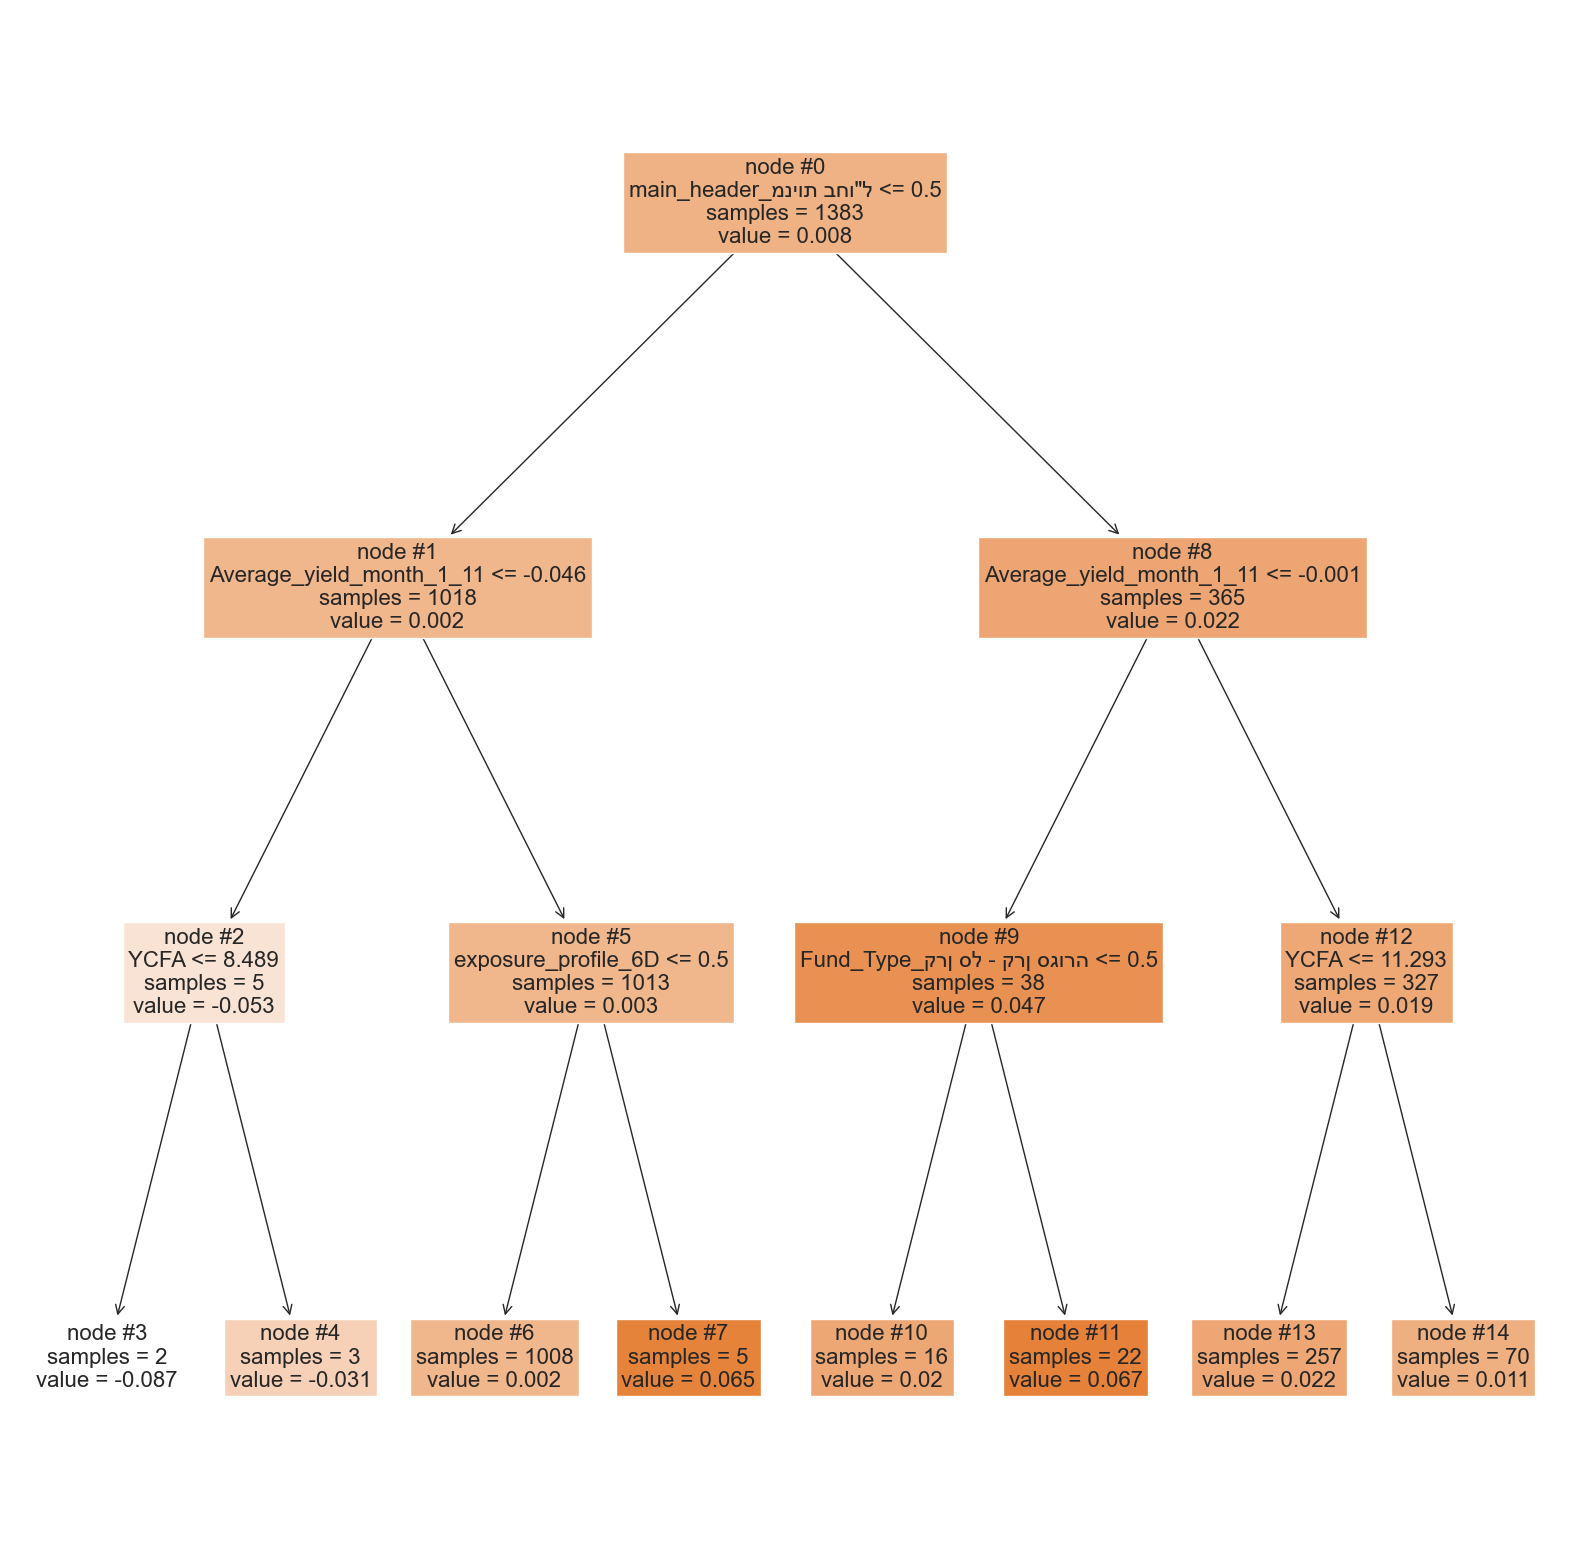

In [144]:
from sklearn import tree

text_representation = tree.export_text(dtm_regressor)
print(text_representation)

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(dtm_regressor, feature_names=Data_for_predict1.iloc[:, 1:].columns, filled=True, impurity=False, node_ids=True, fontsize=16)

#### K-nearest Neighbours Regression

RMSE value for k=  1 is: 0.019564243561755255
RMSE value for k=  2 is: 0.015621325935013803
RMSE value for k=  3 is: 0.014335660527906254
RMSE value for k=  4 is: 0.013627332289564332
RMSE value for k=  5 is: 0.01342353793638571
RMSE value for k=  6 is: 0.01337437100271178
RMSE value for k=  7 is: 0.013484452290602167
RMSE value for k=  8 is: 0.013267587818489827
RMSE value for k=  9 is: 0.013182064228115626
RMSE value for k=  10 is: 0.013263729761318753
RMSE value for k=  11 is: 0.013114039236188665
RMSE value for k=  12 is: 0.013116280509239197
RMSE value for k=  13 is: 0.013044772310019333
RMSE value for k=  14 is: 0.012993802089208258
RMSE value for k=  15 is: 0.012968723988563679
RMSE value for k=  16 is: 0.012871672888186924
RMSE value for k=  17 is: 0.01281858707570209
RMSE value for k=  18 is: 0.012882122846631866
RMSE value for k=  19 is: 0.012934569161427819
RMSE value for k=  20 is: 0.012919582804683232


<AxesSubplot: >

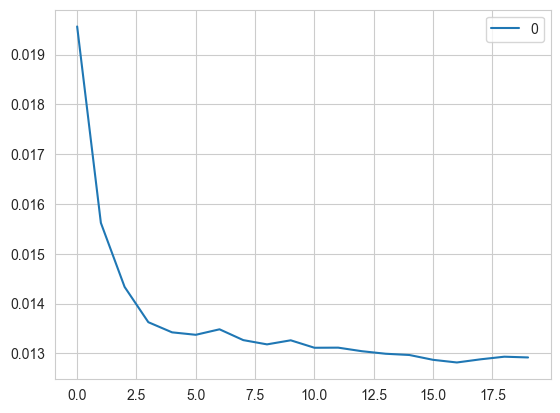

In [145]:
#import required packages
from sklearn import neighbors
from math import sqrt

rmse_val = [] #to store rmse values for different k
k_value = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    k_value.append(K) #store k values
    print('RMSE value for k= ' , K , 'is:', error)
    
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [146]:
min(rmse_val) # k=17

0.01281858707570209

In [149]:
KNN_model = neighbors.KNeighborsRegressor(n_neighbors = 17)
  
# fit the regressor with X and Y data
KNN_model.fit(x_train, y_train)
y_pred = KNN_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
adjr2 = adj_r2(y_test, y_pred,x_test)
mape = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",mape)
print("adj r2:",adjr2)

mse: 0.00016431617461735664
mae: 0.007708441197980268
rmse: 0.01281858707570209
mape: 545.1549658850595
adj r2: 0.03090572037902939


## 

## Yearly yield forecast

Preparing a data set for the prediction

In [150]:
average_yield12_months = yield_data
average_yield12_months = average_yield12_months.groupby(['Fund_Number'])['yield'].mean().reset_index(name='average_yield12')

year_predict_yield = predict_yield.drop('yield',axis=1)
year_predict_yield = pd.merge(year_predict_yield,year_yield,on =['Fund_Number'],how ="left") #הוספת התשואה השתנית 
year_predict_yield = pd.merge(year_predict_yield,average_yield12_months,on =['Fund_Number'],how ="left")#הוספת משתנה: תשואה ממוצעת עבור חודש 1-12 
year_predict_yield['Yearly_yield'] = year_predict_yield['Yearly_yield']/100
Data_for_predict2 =year_predict_yield

Data_for_predict2 = Data_for_predict2.drop('Fund_Number',axis=1)
Data_for_predict2 = Data_for_predict2.drop('Average_yield',axis=1)

Data_for_predict2 = swap_columns(Data_for_predict2, 'Yearly_yield' , 'mannager_wage')
Data_for_predict2 = swap_columns(Data_for_predict2, 'trustee_salary' , 'average_yield12')
Data_for_predict2 = swap_columns(Data_for_predict2, 'trustee_salary' , 'average_yield12')

Data_for_predict2.rename(columns={'Yield':'year_yield'}, inplace=True)

Data_for_predict2

,Yearly_yield,trustee_salary,quartile,YCFA,YVCF,Fund_Type_פתוחה רגילה,Fund_Type_קרן טכנולוגיה עילית - קרן סגורה,Fund_Type_קרן מחקה - קרן פתוחה,Fund_Type_קרן סל - קרן סגורה,"main_header_אג""ח בארץ - חברות והמרה",...,Mannager_Number_513846808,Mannager_Number_514884485,Mannager_Number_515430999,leveraged_fund,Imitator_fund,kosher,Reverse_exposure_fund,Fixed_deadlines_fund,mannager_wage,average_yield12
0,-1.0000,0.0010,4,3.221918,0.172512,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0130,0.009056
1,0.1484,0.0002,4,15.251908,0.049479,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.0025,0.007538
2,0.2111,0.0002,4,13.435768,0.056566,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.0020,0.012444
3,0.2626,0.0002,4,12.214286,0.047298,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.0050,0.015973
4,0.3484,0.0003,4,8.116183,0.101477,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.0080,0.020380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,0.0439,0.0004,3,4.761905,0.129694,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0055,0.002999
1725,0.0890,0.0004,2,3.123288,0.112389,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0055,0.006134
1726,0.0591,0.0004,3,1.798476,0.087978,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0060,0.004467
1727,-0.0600,0.0003,2,4.979592,0.030298,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0078,-0.003015


In [ ]:
# Data_for_predict2[['Yearly_yield','average_yield12','YCFA','YVCF','quartile','trustee_salary','mannager_wage','Fund_Type_פתוחה רגילה','Mannager_Number_510791031']]

In [151]:
Data_for_predict2.info()
# There are no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 0 to 1728
Data columns (total 87 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Yearly_yield                               1729 non-null   float64
 1   trustee_salary                             1729 non-null   float64
 2   quartile                                   1729 non-null   int32  
 3   YCFA                                       1729 non-null   float64
 4   YVCF                                       1729 non-null   float64
 5   Fund_Type_פתוחה רגילה                      1729 non-null   uint8  
 6   Fund_Type_קרן טכנולוגיה עילית - קרן סגורה  1729 non-null   uint8  
 7   Fund_Type_קרן מחקה - קרן פתוחה             1729 non-null   uint8  
 8   Fund_Type_קרן סל - קרן סגורה               1729 non-null   uint8  
 9   main_header_אג"ח בארץ - חברות והמרה        1729 non-null   uint8  
 10  main_header_אג"ח בארץ - 

#### 

Dependent and Independent variables

In [152]:
Xyear = Data_for_predict2.iloc[:, 1:].values
Yyear = Data_for_predict2.iloc[:,0:1].values

Training and testing sets 

In [153]:
x_train, x_test, y_train, y_test = train_test_split(Xyear, Yyear,test_size=0.2,random_state=0)

Standardization

In [154]:
scaler = StandardScaler()
scaler = StandardScaler().fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)

array([[-0.20169078, -1.63844934,  1.12717354, ..., -0.04662524,
        -0.81048636,  0.27335897],
       [-0.20169078, -1.63844934, -0.05592354, ..., -0.04662524,
         0.49576051,  0.84260986],
       [ 1.53499846, -0.69153106, -1.59213538, ..., -0.04662524,
         0.44351064, -0.69639488],
       ...,
       [-1.5042077 ,  0.25538721,  1.14960103, ..., -0.04662524,
        -1.24590198,  1.06423821],
       [-0.20169078,  1.20230549,  1.07260367, ..., -0.04662524,
        -0.20090448, -0.42359551],
       [-0.20169078, -1.63844934, -0.20946607, ..., -0.04662524,
        -1.07173573,  0.08533372]])

#### 

#### Linear Regression

In [178]:
lrm_regressor = LinearRegression()
lrm_regressor.fit(x_train, y_train)
y_pred = lrm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
adj_r2 = adj_r2(y_test, y_pred,x_test)
MAPE = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",MAPE)
print("adj r2:",adj_r2)

mse: 2.2630903009521744e+17
mae: 45209547.073945984
rmse: 475719486.7726331
mape: 83373522500.48436
adj r2: -2.042591236056241e+19


In [179]:
# print regression coefficients

reg_coef = pd.DataFrame({"Feature":Data_for_predict2.iloc[:, 1:].columns.tolist(),"Coefficients":lrm_regressor.coef_[0]})
reg_coef = reg_coef.sort_values('Coefficients', ascending=(False))
reg_coef.head(30)

,Feature,Coefficients
4,Fund_Type_פתוחה רגילה,155796832663.28888
80,Imitator_fund,97392053025.05194
24,main_header_קרן סגורה,72003119401.02142
5,Fund_Type_קרן טכנולוגיה עילית - קרן סגורה,68446613060.39311
7,Fund_Type_קרן סל - קרן סגורה,58404779638.25596
6,Fund_Type_קרן מחקה - קרן פתוחה,58404779638.25452
57,ta_policy_חייבת,6670908262.57507
59,ta_policy_פטורה,6670908262.55665
55,exposure_profile_6D,2903547474.03417
53,exposure_profile_60,2903547474.01922


#### Lasso Regression

In [163]:
# Create a Lasso regression model
lasso = Lasso()

# Set up a grid of hyperparameter values to search over
param_grid = {'alpha': [0.0001,0.001, 0.01, 0.1, 0.2, 0.5, 1, 5, 10, 100]}

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameter and score
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameter:  {'alpha': 0.0001}
Best score:  0.8341011778022038


In [164]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha = 0.0001)
lasso.fit(x_train, y_train)
y_pred=lasso.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
#mape = mape(y_test, y_pred)
adj_r2 = adj_r2(y_test, y_pred,x_test)
MAPE = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",MAPE)
print("adj r2:",adj_r2)

mse: 0.0016541971043703247
mae: 0.025793490558793937
rmse: 0.04067182199472166
mape: 868.667971045509
adj r2: 0.850697583447076


In [169]:
# print lasso coefficients

lasso_coef = pd.DataFrame({"Feature":Data_for_predict2.iloc[:, 1:].columns.tolist(),"Coefficients":lasso.coef_})
lasso_coef = lasso_coef.sort_values('Coefficients', ascending=(False))
#pd.options.display.float_format = '{:.5f}'.format
lasso_coef.head(30)

,Feature,Coefficients
85,average_yield12,8.34241
79,leveraged_fund,0.17675
18,main_header_ממונפות,0.09673
20,main_header_מניות בארץ,0.05792
47,exposure_profile_4B,0.04746
21,"main_header_מניות בחו""ל",0.04712
46,exposure_profile_4A,0.04506
16,main_header_גמישות,0.03554
55,exposure_profile_6D,0.03505
45,exposure_profile_40,0.03097


#### Random Forest

In [171]:
rfm_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rfm_regressor.fit(x_train,y_train)  
y_pred = rfm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
adj_r2 = adj_r2(y_test, y_pred,x_test)
MAPE = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",MAPE)
print("adj r2:",adj_r2)

mse: 0.0016271626325581766
mae: 0.020108067919075163
rmse: 0.040338103978226056
mape: 880.0829363609027
adj r2: 0.8531376263906418


#### DecisionTree

In [175]:
# Create a decision tree regressor
dtr = DecisionTreeRegressor()

# Set up a grid of hyperparameter values to search over
param_grid = {'max_depth': range(1, 20)}

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(dtr, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameter and score
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameter:  {'max_depth': 7}
Best score:  0.8294924783248667


In [181]:
# create a regressor object
dtm_regressor = DecisionTreeRegressor(max_depth = 7,random_state = 0) 
  
# fit the regressor with X and Y data
dtm_regressor.fit(x_train, y_train)
y_pred = dtm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
adj_r2 = adj_r2(y_test, y_pred,x_test)
MAPE = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",MAPE)
print("adj r2:",adj_r2)

mse: 0.00194866650222868
mae: 0.0238489427505511
rmse: 0.04414370286041577
mape: 876.3326468431011
adj r2: 0.8241197393769932


|--- feature_85 <= 0.01
|   |--- feature_85 <= -0.02
|   |   |--- feature_55 <= 0.50
|   |   |   |--- feature_85 <= -0.07
|   |   |   |   |--- feature_2 <= 9.51
|   |   |   |   |   |--- value: [-0.53]
|   |   |   |   |--- feature_2 >  9.51
|   |   |   |   |   |--- value: [-0.48]
|   |   |   |--- feature_85 >  -0.07
|   |   |   |   |--- feature_75 <= 0.50
|   |   |   |   |   |--- feature_84 <= 0.01
|   |   |   |   |   |   |--- feature_45 <= 0.50
|   |   |   |   |   |   |   |--- value: [-0.19]
|   |   |   |   |   |   |--- feature_45 >  0.50
|   |   |   |   |   |   |   |--- value: [-0.19]
|   |   |   |   |   |--- feature_84 >  0.01
|   |   |   |   |   |   |--- feature_3 <= 0.01
|   |   |   |   |   |   |   |--- value: [-0.32]
|   |   |   |   |   |   |--- feature_3 >  0.01
|   |   |   |   |   |   |   |--- value: [-0.28]
|   |   |   |   |--- feature_75 >  0.50
|   |   |   |   |   |--- value: [-0.47]
|   |   |--- feature_55 >  0.50
|   |   |   |--- feature_85 <= -0.06
|   |   |   |   |--- val

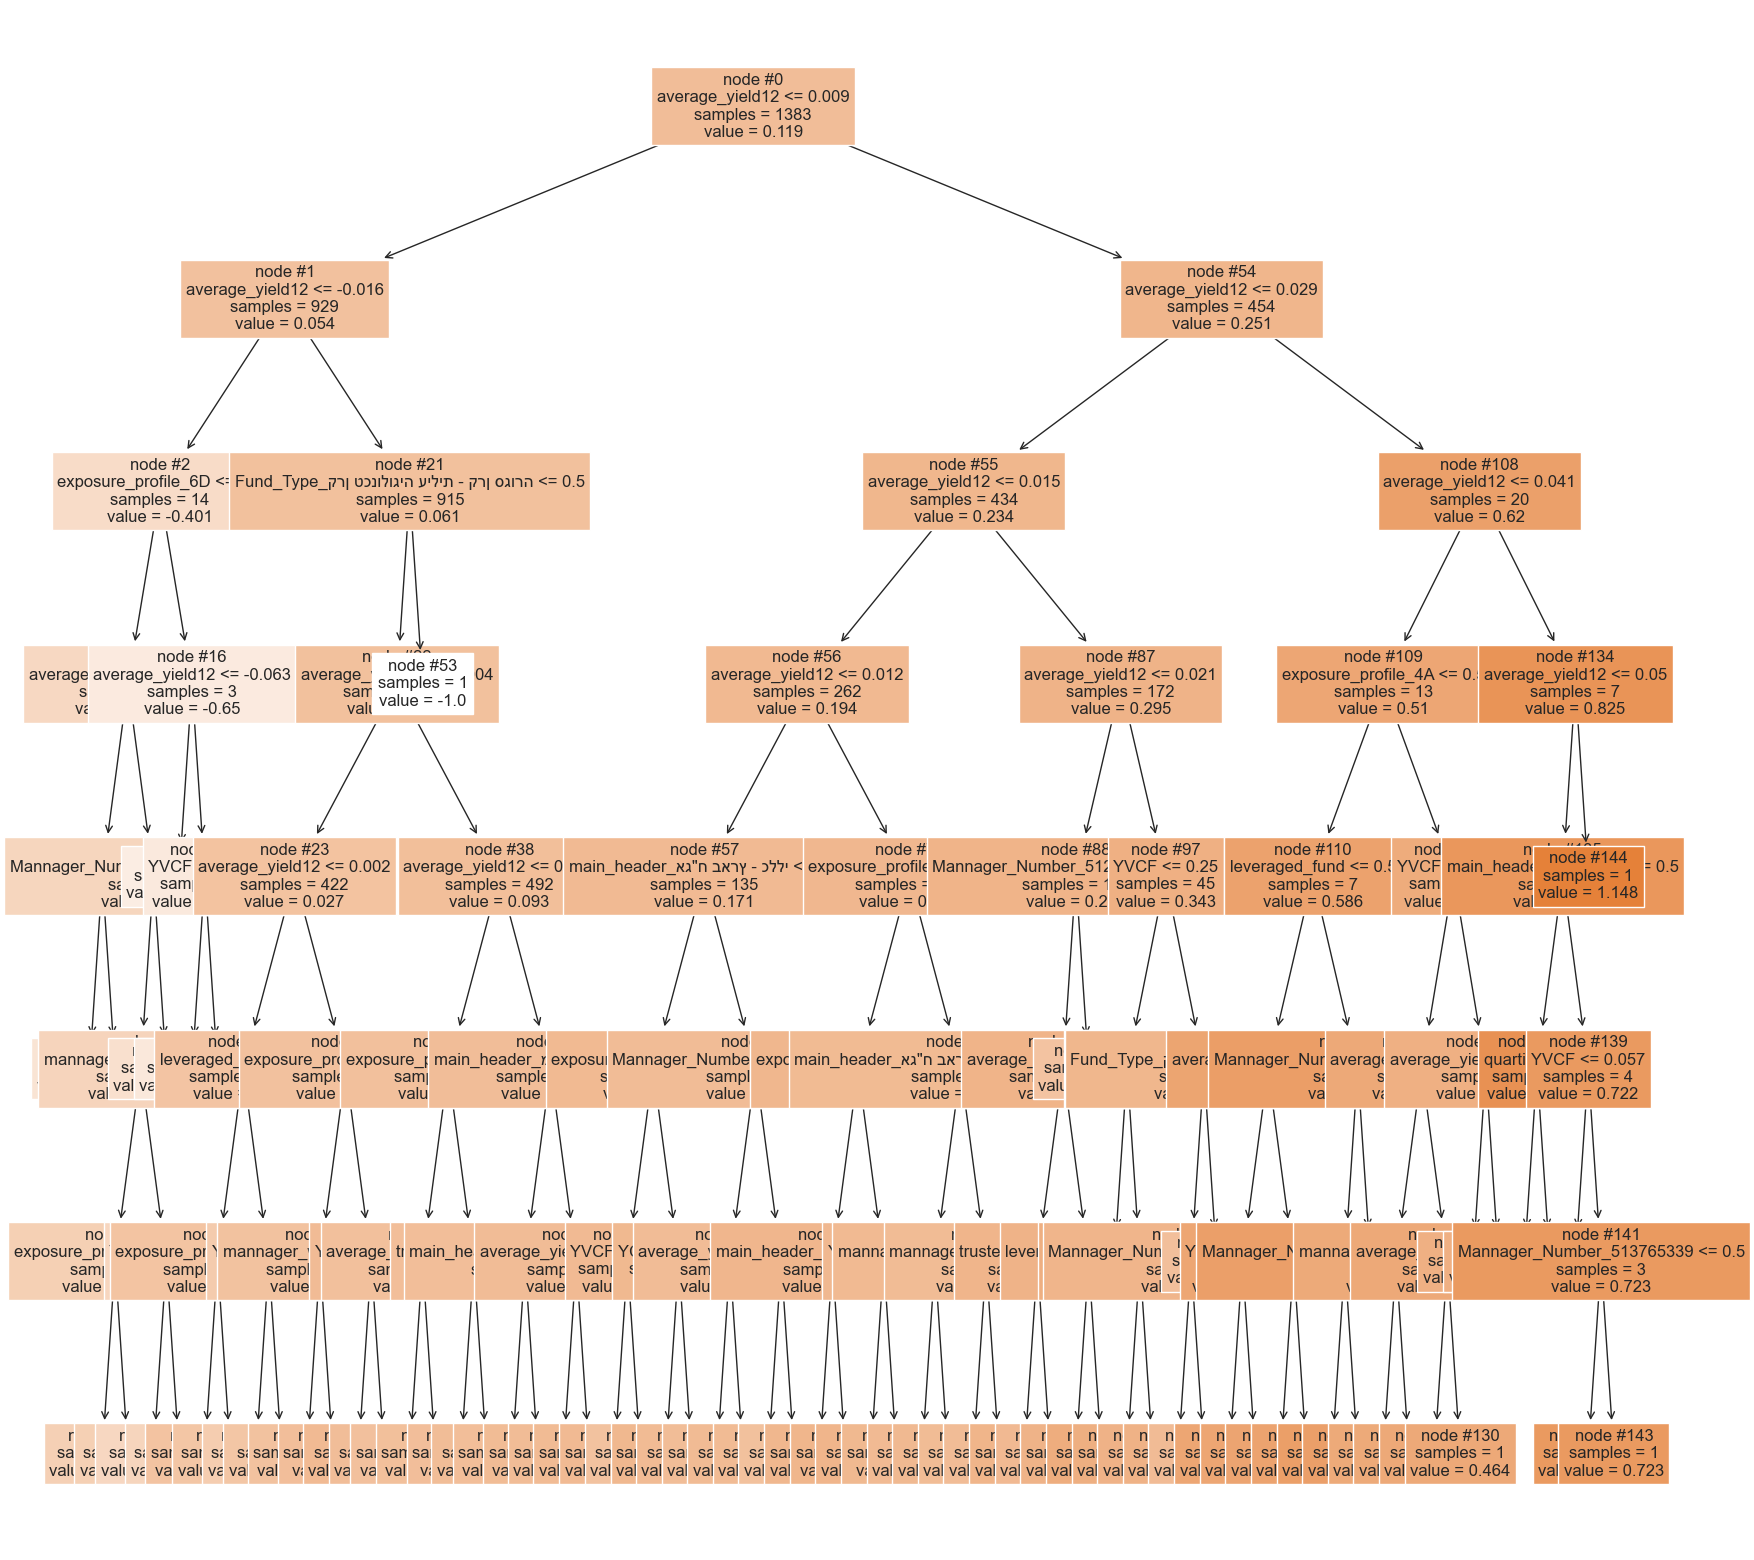

In [183]:
text_representation = tree.export_text(dtm_regressor)
print(text_representation)

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(dtm_regressor, feature_names=Data_for_predict2.iloc[:, 1:].columns, filled=True, impurity=False, node_ids=True, fontsize=12)

#### K-nearest Neighbours Regression

RMSE value for k=  1 is: 0.12347095209627522
RMSE value for k=  2 is: 0.10646961879068378
RMSE value for k=  3 is: 0.09843728597962277
RMSE value for k=  4 is: 0.09454043014350871
RMSE value for k=  5 is: 0.09502474878725502
RMSE value for k=  6 is: 0.09290572634038041
RMSE value for k=  7 is: 0.09179962428375549
RMSE value for k=  8 is: 0.09103103727609291
RMSE value for k=  9 is: 0.08984705583468414
RMSE value for k=  10 is: 0.08965643149802213
RMSE value for k=  11 is: 0.0897170642534532
RMSE value for k=  12 is: 0.0899087923325869
RMSE value for k=  13 is: 0.0906053935339896
RMSE value for k=  14 is: 0.09013448928121974
RMSE value for k=  15 is: 0.0909449731848414
RMSE value for k=  16 is: 0.09036618199876321
RMSE value for k=  17 is: 0.09044848933593855
RMSE value for k=  18 is: 0.09079767440390159
RMSE value for k=  19 is: 0.09071210280733208
RMSE value for k=  20 is: 0.09039595305599546


<AxesSubplot: >

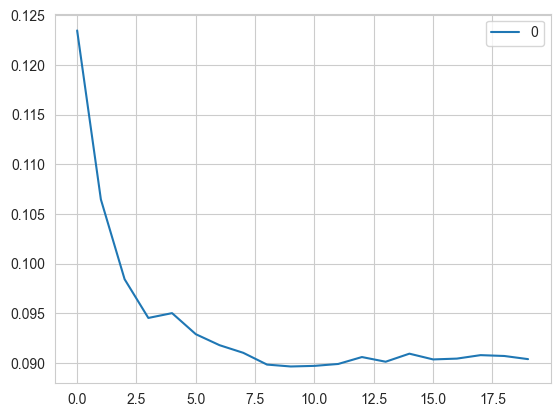

In [184]:
rmse_val = [] #to store rmse values for different k
k_value = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    k_value.append(K) #store k values
    print('RMSE value for k= ' , K , 'is:', error)
    
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [185]:
min(rmse_val) # k = 10

0.08965643149802213

In [188]:
KNN_model = neighbors.KNeighborsRegressor(n_neighbors = 10)
  
# fit the regressor with X and Y data
KNN_model.fit(x_train, y_train)
y_pred = KNN_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
#mape = mape(y_test, y_pred)
adj_r2 = adj_r2(y_test, y_pred,x_test)
MAPE = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",MAPE)
print("adj r2:",adj_r2)

mse: 0.008038275708959536
mae: 0.05713436416184971
rmse: 0.08965643149802213
mape: 333.4089211715307
adj r2: 0.27449154330181114


# 

## Monthly yield forecast

Preparing a data set for the prediction

In [189]:
df_last = pd.merge(yield_data,predict_yield.drop(['yield','Average_yield','YCFA','YVCF'],axis=1),on =['Fund_Number'],how ="inner")

# להסביר 
df_last = df_last.loc[df_last['yield'].isnull()==False]
df_last = df_last.reset_index(drop = True)

# df_last[['Fund_Number','month','rate1','rate2']].to_excel('rate1_2.xlsx', index=False)

mr = pd.read_csv('MVCF.csv',encoding='UTF-8') 
df_last = pd.merge(df_last,mr,on =['Fund_Number','month'],how ="inner")
print(df_last.isnull().sum().sum())

mr1 = pd.read_csv('Mcfa_Montlhy.csv',encoding='UTF-8') 
df_last = pd.merge(df_last,mr1[['Fund_Number','month','rate1']],on =['Fund_Number','month'],how ="inner")
print(df_last.isnull().sum().sum())

df_last = swap_columns(df_last, 'yield' , 'Fund_Name')
Data_for_predict3 = df_last.drop(['Fund_Number','month','Report_Date','Fund_Name','Amount','Value','Price_YECHIDA'],axis=1)

Data_for_predict3.rename(columns={'yield':'yield_monthly'}, inplace=True)
Data_for_predict3.rename(columns={'rate1':'MCFA'}, inplace=True)
Data_for_predict3.rename(columns={'rate2':'MVCF'}, inplace=True)

Data_for_predict3

0
1


,yield_monthly,mannager_wage,trustee_salary,quartile,Fund_Type_פתוחה רגילה,Fund_Type_קרן טכנולוגיה עילית - קרן סגורה,Fund_Type_קרן מחקה - קרן פתוחה,Fund_Type_קרן סל - קרן סגורה,"main_header_אג""ח בארץ - חברות והמרה","main_header_אג""ח בארץ - כללי",...,Mannager_Number_513846808,Mannager_Number_514884485,Mannager_Number_515430999,leveraged_fund,Imitator_fund,kosher,Reverse_exposure_fund,Fixed_deadlines_fund,MVCF,MCFA
0,0.01438,0.01300,0.00100,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.00063,0.23333
1,0.01226,0.01300,0.00100,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.46850,0.61290
2,0.01800,0.01300,0.00100,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.25838,0.61290
3,-0.01039,0.01300,0.00100,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.13527,0.58065
4,0.00045,0.01300,0.00100,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.23494,0.32258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18355,-0.00916,0.01500,0.00030,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.03451,0.14876
18356,0.03813,0.01500,0.00030,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.05248,0.20155
18357,0.02852,0.01500,0.00030,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.04559,0.13333
18358,0.01591,0.01500,0.00030,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.15726,0.27941


In [ ]:
#Data_for_predict3[['yield_monthly','MCFA','MVCF','quartile','main_header_אג"ח בארץ - כללי','Fund_Type_פתוחה רגילה','Mannager_Number_510791031','exposure_profile_00','leveraged_fund']]

In [190]:
Data_for_predict3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18360 entries, 0 to 18359
Data columns (total 86 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   yield_monthly                              18360 non-null  float64
 1   mannager_wage                              18360 non-null  float64
 2   trustee_salary                             18360 non-null  float64
 3   quartile                                   18360 non-null  int32  
 4   Fund_Type_פתוחה רגילה                      18360 non-null  uint8  
 5   Fund_Type_קרן טכנולוגיה עילית - קרן סגורה  18360 non-null  uint8  
 6   Fund_Type_קרן מחקה - קרן פתוחה             18360 non-null  uint8  
 7   Fund_Type_קרן סל - קרן סגורה               18360 non-null  uint8  
 8   main_header_אג"ח בארץ - חברות והמרה        18360 non-null  uint8  
 9   main_header_אג"ח בארץ - כללי               18360 non-null  uint8  
 10  main_header_אג"ח בארץ 

In [192]:
null_rate1 = Data_for_predict3[Data_for_predict3['MCFA'].isnull()]
null_rate1

,yield_monthly,mannager_wage,trustee_salary,quartile,Fund_Type_פתוחה רגילה,Fund_Type_קרן טכנולוגיה עילית - קרן סגורה,Fund_Type_קרן מחקה - קרן פתוחה,Fund_Type_קרן סל - קרן סגורה,"main_header_אג""ח בארץ - חברות והמרה","main_header_אג""ח בארץ - כללי",...,Mannager_Number_513846808,Mannager_Number_514884485,Mannager_Number_515430999,leveraged_fund,Imitator_fund,kosher,Reverse_exposure_fund,Fixed_deadlines_fund,MVCF,MCFA
17885,0.00023,0.00000,0.00020,2,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.00000,NaN


In [193]:
def inf(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    indices_to_keep = df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [194]:
inf(Data_for_predict3)

,yield_monthly,mannager_wage,trustee_salary,quartile,Fund_Type_פתוחה רגילה,Fund_Type_קרן טכנולוגיה עילית - קרן סגורה,Fund_Type_קרן מחקה - קרן פתוחה,Fund_Type_קרן סל - קרן סגורה,"main_header_אג""ח בארץ - חברות והמרה","main_header_אג""ח בארץ - כללי",...,Mannager_Number_513846808,Mannager_Number_514884485,Mannager_Number_515430999,leveraged_fund,Imitator_fund,kosher,Reverse_exposure_fund,Fixed_deadlines_fund,MVCF,MCFA
11461,0.03409,0.00250,0.00025,3.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,inf
17885,0.00023,0.00000,0.00020,2.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,NaN


In [195]:
Data_for_predict3.drop(index=17885, inplace=True)
Data_for_predict3.drop(index=11461, inplace=True)

In [196]:
Data_for_predict3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18358 entries, 0 to 18359
Data columns (total 86 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   yield_monthly                              18358 non-null  float64
 1   mannager_wage                              18358 non-null  float64
 2   trustee_salary                             18358 non-null  float64
 3   quartile                                   18358 non-null  int32  
 4   Fund_Type_פתוחה רגילה                      18358 non-null  uint8  
 5   Fund_Type_קרן טכנולוגיה עילית - קרן סגורה  18358 non-null  uint8  
 6   Fund_Type_קרן מחקה - קרן פתוחה             18358 non-null  uint8  
 7   Fund_Type_קרן סל - קרן סגורה               18358 non-null  uint8  
 8   main_header_אג"ח בארץ - חברות והמרה        18358 non-null  uint8  
 9   main_header_אג"ח בארץ - כללי               18358 non-null  uint8  
 10  main_header_אג"ח בארץ 

### 

Dependent and Independent variables

In [197]:
X_monthly = Data_for_predict3.iloc[:, 1:].values
Y_monthly = Data_for_predict3.iloc[:,0:1].values

Training and testing sets

In [198]:
x_train, x_test, y_train, y_test = train_test_split(X_monthly, Y_monthly,test_size=0.2,random_state=0)

Standardization

In [212]:
scaler = StandardScaler()
scaler = StandardScaler().fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)

array([[-0.40868414,  0.65262588, -1.6733207 , ..., -0.04291703,
         1.05537756, -0.04218538],
       [ 1.63218013,  0.65262588,  1.20042855, ..., -0.04291703,
         0.86078295,  0.28341615],
       [-1.24203705, -1.08500897, -1.6733207 , ..., -0.04291703,
         0.78134592, -0.02023134],
       ...,
       [-0.56174896, -0.21619154, -1.6733207 , ..., -0.04291703,
        -0.06423165,  0.83597639],
       [-0.901893  , -1.08500897,  0.24251214, ..., -0.04291703,
        -0.29004284,  0.83597639],
       [-0.39167693, -0.65060026, -1.6733207 , ..., -0.04291703,
         0.27020297,  0.16444092]])

##### 

#### Linear Regression

In [214]:
lrm_regressor = LinearRegression()
lrm_regressor.fit(x_train, y_train)
y_pred = lrm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
adj_r2 = adj_r2(y_test, y_pred,x_test)
MAPE = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",MAPE)
print("adj r2:",adj_r2)


mse: 0.0005427798077277252
mae: 0.013424601422288641
rmse: 0.023297635238962024
mape: 432.5432081930392
adj r2: -0.00037389865417836177


# 4. מקדמים גבוהים 

In [216]:
# print regression coefficients

reg_coef = pd.DataFrame({"Feature":Data_for_predict3.iloc[:, 1:].columns.tolist(),"Coefficients":lrm_regressor.coef_[0]})
reg_coef = reg_coef.sort_values('Coefficients', ascending=(False))
reg_coef.head(30)

,Feature,Coefficients
3,Fund_Type_פתוחה רגילה,226634310007.26761
23,main_header_קרן סגורה,182522772732.56857
5,Fund_Type_קרן מחקה - קרן פתוחה,176134356358.14246
6,Fund_Type_קרן סל - קרן סגורה,176134356358.14200
79,Imitator_fund,50499953649.12550
4,Fund_Type_קרן טכנולוגיה עילית - קרן סגורה,24013544036.65467
62,Mannager_Number_511146490,12030070951.26352
76,Mannager_Number_514884485,12030070951.26263
65,Mannager_Number_511756595,12030070951.26263
60,Mannager_Number_510918741,12030070951.26173


#### Lasso regression

In [218]:
# Create a Lasso regression model
lasso = Lasso()

# Set up a grid of hyperparameter values to search over
param_grid = {'alpha': [0.0001,0.001, 0.01, 0.1, 0.2, 0.5, 1, 5, 10, 100]}

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameter and score
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameter:  {'alpha': 0.0001}
Best score:  0.04607388736990488


In [219]:
lasso = Lasso(alpha = 0.0001)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
adj_r2 = adj_r2(y_test, y_pred,x_test)
MAPE = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",MAPE)
print("adj r2:",adj_r2)

mse: 0.0005429325090304104
mae: 0.013644160796129852
rmse: 0.02330091219309687
mape: 658.7432471467093
adj r2: -0.0006553357955789707


In [220]:
# print lasso coefficients

lasso_coef = pd.DataFrame({"Feature":Data_for_predict3.iloc[:, 1:].columns.tolist(),"Coefficients":lasso.coef_})
lasso_coef = lasso_coef.sort_values('Coefficients', ascending=(False))
#pd.options.display.float_format = '{:.5f}'.format
lasso_coef.head(30)

,Feature,Coefficients
45,exposure_profile_4A,0.00512
19,main_header_מניות בארץ,0.00510
18,main_header_ממונפות ואסטרטגיות,0.00467
20,"main_header_מניות בחו""ל",0.00272
46,exposure_profile_4B,0.00247
48,exposure_profile_4D,0.00015
80,kosher,0.00014
84,MCFA,0.00007
2,quartile,0.00004
56,ta_policy_חייבת,-0.00000


#### Random Forest

In [222]:
rfm_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rfm_regressor.fit(x_train,y_train)  
y_pred = rfm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
adj_r2 = adj_r2(y_test, y_pred,x_test)
MAPE = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",MAPE)
print("adj r2:",adj_r2)

mse: 0.0005756359057749332
mae: 0.013894431034549333
rmse: 0.02399241350458376
mape: 832.1590251911229
adj r2: -0.0609295465063866


#### Decision Tree

In [224]:
# Create a decision tree regressor
dtr = DecisionTreeRegressor()

# Set up a grid of hyperparameter values to search over
param_grid = {'max_depth': range(1, 11)}

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(dtr, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameter and score
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameter:  {'max_depth': 2}
Best score:  0.039183846212823316


In [225]:
# create a regressor object
dtm_regressor = DecisionTreeRegressor(max_depth = 2,random_state = 0) 
  
# fit the regressor with X and Y data
dtm_regressor.fit(x_train, y_train)
y_pred = dtm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
adj_r2 = adj_r2(y_test, y_pred,x_test)
MAPE = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",MAPE)
print("adj r2:",adj_r2)

mse: 0.0005531796520167551
mae: 0.013904083009275215
rmse: 0.0235197715128518
mape: 669.6268877899547
adj r2: -0.01954140015053496


|--- feature_81 <= 0.50
|   |--- feature_45 <= 0.50
|   |   |--- value: [0.01]
|   |--- feature_45 >  0.50
|   |   |--- value: [0.02]
|--- feature_81 >  0.50
|   |--- feature_54 <= 0.50
|   |   |--- value: [-0.02]
|   |--- feature_54 >  0.50
|   |   |--- value: [-0.07]



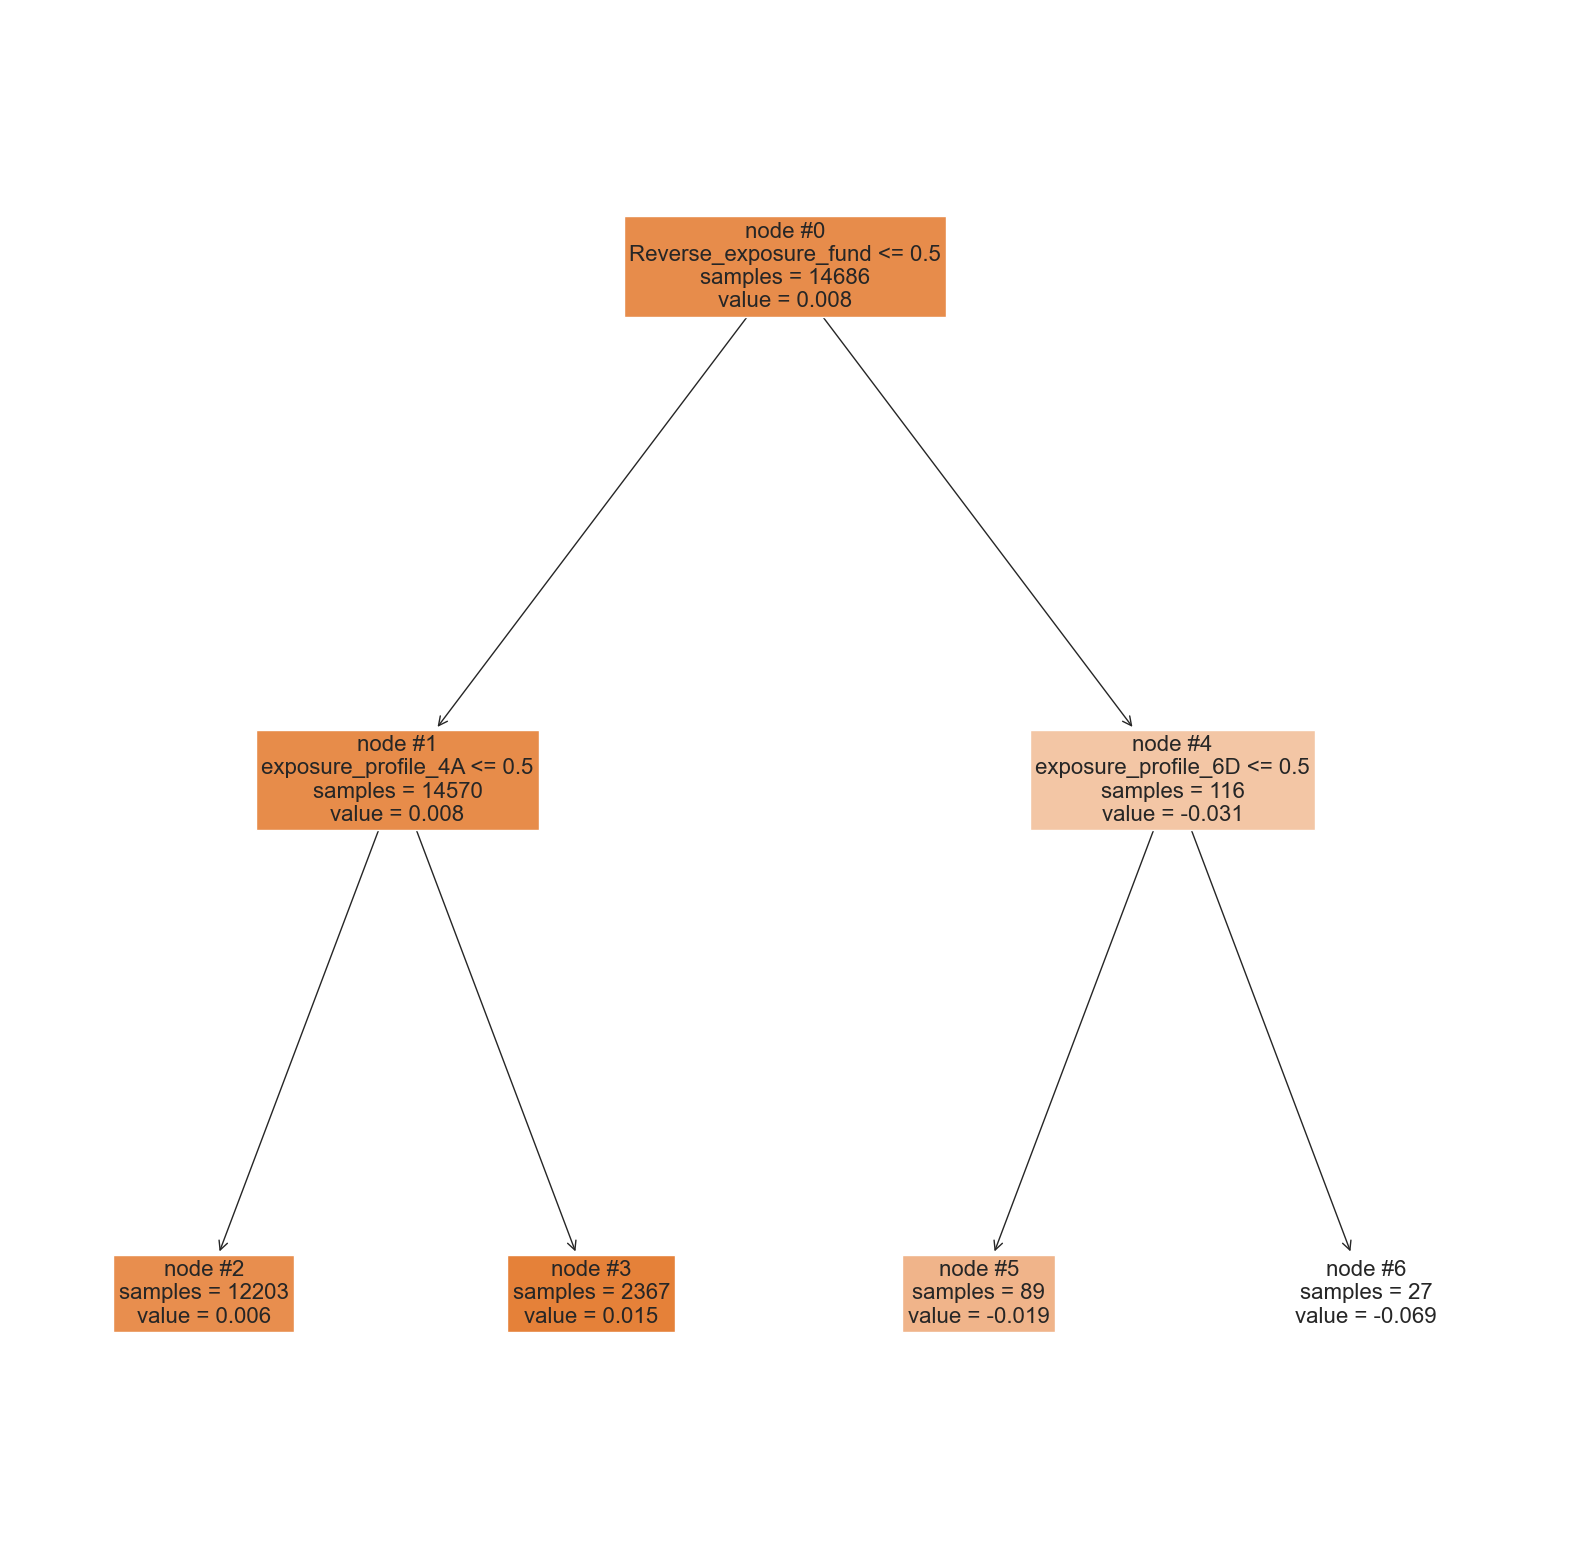

In [227]:
text_representation = tree.export_text(dtm_regressor)
print(text_representation)

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(dtm_regressor, feature_names=Data_for_predict3.iloc[:, 1:].columns, filled=True, impurity=False, node_ids=True, fontsize=16)

#### K-nearest Neighbours Regression

RMSE value for k=  1 is: 0.030796711119560723
RMSE value for k=  2 is: 0.027786336034300193
RMSE value for k=  3 is: 0.025768863535428458
RMSE value for k=  4 is: 0.024806966752386635
RMSE value for k=  5 is: 0.024558608885143992
RMSE value for k=  6 is: 0.024541377088168687
RMSE value for k=  7 is: 0.024308942349646746
RMSE value for k=  8 is: 0.024102272753747562
RMSE value for k=  9 is: 0.02398623776010065
RMSE value for k=  10 is: 0.02390301711425871
RMSE value for k=  11 is: 0.023705186725595715
RMSE value for k=  12 is: 0.023653432871930297
RMSE value for k=  13 is: 0.023579732599807578
RMSE value for k=  14 is: 0.023479103539762854
RMSE value for k=  15 is: 0.0234624641441842
RMSE value for k=  16 is: 0.02344204609717717
RMSE value for k=  17 is: 0.023431594625952845
RMSE value for k=  18 is: 0.023435643585358934
RMSE value for k=  19 is: 0.023470038667865265
RMSE value for k=  20 is: 0.0235332272072093


<AxesSubplot: >

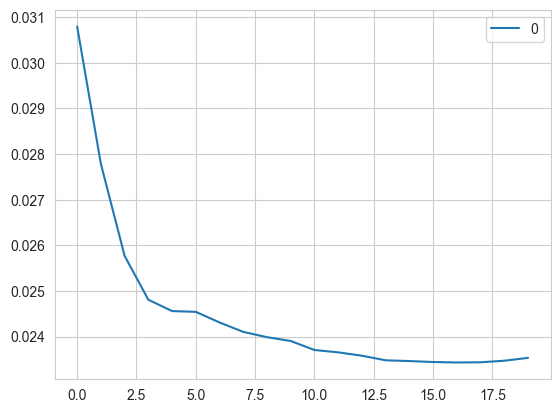

In [228]:
rmse_val = [] #to store rmse values for different k
k_value = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    k_value.append(K) #store k values
    print('RMSE value for k= ' , K , 'is:', error)
    
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [229]:
min(rmse_val) # k = 17

0.023431594625952845

In [232]:
KNN_model = neighbors.KNeighborsRegressor(n_neighbors = 17)
  
# fit the regressor with X and Y data
KNN_model.fit(x_train, y_train)
y_pred = KNN_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
#mape = mape(y_test, y_pred)
adj_r2 = adj_r2(y_test, y_pred,x_test)
MAPE = MAPE(y_test,y_pred)

print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print("mape:",MAPE)
print("adj r2:",adj_r2)

mse: 0.0005490396267149823
mae: 0.013574033652755625
rmse: 0.023431594625952845
mape: 410.66243716921286
adj r2: -0.011911099257434943
